# CIV1498 - Introduction to Data Science
## Project 2 - Toronto Bike Share - Exploratory Analysis


## Setup Notebook

In [1]:
# Import 3rd party libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

# 1.0 Data Cleaning
# 1.1 Weather Data

In [2]:
# Set weather data path
path_weather = os.path.join(os.path.abspath(os.getcwd()), 'data', 'weather')

# Get weather file names
weather_filenames = [filename for filename in os.listdir(path_weather) if 'climate' in filename]

# Print file names
print(weather_filenames[0:5])

['en_climate_hourly_ON_6158359_01-2017_P1H.csv', 'en_climate_hourly_ON_6158359_01-2018_P1H.csv', 'en_climate_hourly_ON_6158359_01-2019_P1H.csv', 'en_climate_hourly_ON_6158359_01-2020_P1H.csv', 'en_climate_hourly_ON_6158359_01-2021_P1H.csv']


# 1.2 Bike Share Trip Data

In [3]:
# Set bikeshare data path
path_ridership = os.path.join(os.path.abspath(os.getcwd()), 'data', 'ridership')

# Create a list of file names for bike share trips data
trips_filenames = [filename for filename in os.listdir(os.path.join(path_ridership, 'release')) if 'bike_share' in filename]

# Create a dictionary where key:value pairs correspond to the file name and DataFrame respectively
trips_data = {filename: pd.read_csv(os.path.join(path_ridership, 'release', filename)) for filename in trips_filenames}  

# Now lets print out the column names for the first month of each year
print('2017\n{}\n'.format(trips_data['bike_share_2017-1.csv'].columns.tolist()))
print('2018\n{}\n'.format(trips_data['bike_share_2018-1.csv'].columns.tolist()))
print('2019\n{}\n'.format(trips_data['bike_share_2019-1.csv'].columns.tolist()))
print('2020\n{}\n'.format(trips_data['bike_share_2020-1.csv'].columns.tolist()))
print('2021\n{}\n'.format(trips_data['bike_share_2021-1.csv'].columns.tolist()))

2017
['trip_id', 'trip_start_time', 'trip_stop_time', 'trip_duration_seconds', 'from_station_id', 'from_station_name', 'to_station_id', 'to_station_name', 'user_type']

2018
['trip_id', 'trip_duration_seconds', 'from_station_id', 'trip_start_time', 'from_station_name', 'trip_stop_time', 'to_station_id', 'to_station_name', 'user_type']

2019
['Trip Id', 'Subscription Id', 'Trip  Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'Bike Id', 'User Type']

2020
['Trip Id', 'Subscription Id', 'Trip  Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'Bike Id', 'User Type']

2021
['Trip Id', 'Trip  Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'Bike Id', 'User Type']



# 1.3 Station Data

In [4]:
# Set stations data path
path_ridership = os.path.join(os.path.abspath(os.getcwd()), 'data', 'stations')

# Import stations
stations = pd.read_csv(os.path.join(path_ridership, 'bikeshare_stations.csv'))

# View DataFrame
stations.head()

,station_id,name,lat,lon
0,7000,Fort York Blvd / Capreol Ct,43.639832,-79.395954
1,7001,Wellesley Station Green P,43.664964,-79.383550
2,7002,St. George St / Bloor St W,43.667333,-79.399429
3,7003,Madison Ave / Bloor St W,43.667158,-79.402761
4,7004,University Ave / Elm St,43.656518,-79.389099


# 1.4 Data Cleaning - Weather Data

In [5]:
# Prepare weather data
# Create a dictionary where key:value pairs correspond to the file name and DataFrame respectively
weather_data = {filename: pd.read_csv(os.path.join(path_weather, filename)) for filename in weather_filenames}

# Now lets print out the column names for the first month of each year
print('2017\n{}\n'.format(weather_data['en_climate_hourly_ON_6158359_01-2017_P1H.csv'].columns.tolist()))
print('2018\n{}\n'.format(weather_data['en_climate_hourly_ON_6158359_01-2018_P1H.csv'].columns.tolist()))
print('2019\n{}\n'.format(weather_data['en_climate_hourly_ON_6158359_01-2019_P1H.csv'].columns.tolist()))
print('2020\n{}\n'.format(weather_data['en_climate_hourly_ON_6158359_01-2020_P1H.csv'].columns.tolist()))
print('2021\n{}\n'.format(weather_data['en_climate_hourly_ON_6158359_01-2021_P1H.csv'].columns.tolist()))

2017
['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID', 'Date/Time', 'Year', 'Month', 'Day', 'Time', 'Temp (°C)', 'Temp Flag', 'Dew Point Temp (°C)', 'Dew Point Temp Flag', 'Rel Hum (%)', 'Rel Hum Flag', 'Wind Dir (10s deg)', 'Wind Dir Flag', 'Wind Spd (km/h)', 'Wind Spd Flag', 'Visibility (km)', 'Visibility Flag', 'Stn Press (kPa)', 'Stn Press Flag', 'Hmdx', 'Hmdx Flag', 'Wind Chill', 'Wind Chill Flag', 'Weather']

2018
['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID', 'Date/Time', 'Year', 'Month', 'Day', 'Time', 'Temp (°C)', 'Temp Flag', 'Dew Point Temp (°C)', 'Dew Point Temp Flag', 'Rel Hum (%)', 'Rel Hum Flag', 'Wind Dir (10s deg)', 'Wind Dir Flag', 'Wind Spd (km/h)', 'Wind Spd Flag', 'Visibility (km)', 'Visibility Flag', 'Stn Press (kPa)', 'Stn Press Flag', 'Hmdx', 'Hmdx Flag', 'Wind Chill', 'Wind Chill Flag', 'Weather']

2019
['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID', 'Date/Time', 'Year', 'Month', 'Day', 'Time', 'Temp (°C)', 'Temp F

In [6]:
# Drop the columns related to precipitation and the column named "Time" or "Time (LST)"
# Rename "Date/Time (LST)" to "Date/Time"
for key in weather_data:
    if '2021' not in key:
        weather_data[key].drop(columns=['Time'], inplace=True, axis=1)
    else:
        weather_data[key].drop(columns=['Time (LST)', 'Precip. Amount (mm)', 'Precip. Amount Flag'], inplace=True, axis=1)
        weather_data[key].rename(columns = {'Date/Time (LST)': 'Date/Time'}, inplace = True)

# Check column names again
print('2017\n{}\n'.format(weather_data['en_climate_hourly_ON_6158359_01-2017_P1H.csv'].columns.tolist()))
print('2018\n{}\n'.format(weather_data['en_climate_hourly_ON_6158359_01-2018_P1H.csv'].columns.tolist()))
print('2019\n{}\n'.format(weather_data['en_climate_hourly_ON_6158359_01-2019_P1H.csv'].columns.tolist()))
print('2020\n{}\n'.format(weather_data['en_climate_hourly_ON_6158359_01-2020_P1H.csv'].columns.tolist()))
print('2021\n{}\n'.format(weather_data['en_climate_hourly_ON_6158359_01-2021_P1H.csv'].columns.tolist()))

2017
['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID', 'Date/Time', 'Year', 'Month', 'Day', 'Temp (°C)', 'Temp Flag', 'Dew Point Temp (°C)', 'Dew Point Temp Flag', 'Rel Hum (%)', 'Rel Hum Flag', 'Wind Dir (10s deg)', 'Wind Dir Flag', 'Wind Spd (km/h)', 'Wind Spd Flag', 'Visibility (km)', 'Visibility Flag', 'Stn Press (kPa)', 'Stn Press Flag', 'Hmdx', 'Hmdx Flag', 'Wind Chill', 'Wind Chill Flag', 'Weather']

2018
['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID', 'Date/Time', 'Year', 'Month', 'Day', 'Temp (°C)', 'Temp Flag', 'Dew Point Temp (°C)', 'Dew Point Temp Flag', 'Rel Hum (%)', 'Rel Hum Flag', 'Wind Dir (10s deg)', 'Wind Dir Flag', 'Wind Spd (km/h)', 'Wind Spd Flag', 'Visibility (km)', 'Visibility Flag', 'Stn Press (kPa)', 'Stn Press Flag', 'Hmdx', 'Hmdx Flag', 'Wind Chill', 'Wind Chill Flag', 'Weather']

2019
['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID', 'Date/Time', 'Year', 'Month', 'Day', 'Temp (°C)', 'Temp Flag', 'Dew Point Temp (°

In [7]:
# Create a dictionary where key:value pairs correspond to the file name and DataFrame respectively
weather_data = pd.concat(weather_data.values(), ignore_index = True)

# Set Date/Time as the index such that the index of Weather_data is composed of Timestamps
weather_data = weather_data.set_index('Date/Time')
weather_data.index = pd.DatetimeIndex(weather_data.index)

# Localize the Timestamps to Eastern Standard Time (EST)
weather_data.index = weather_data.index.tz_localize(tz = 'EST')

# View DataFrame
weather_data.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Temp (°C),Temp Flag,Dew Point Temp (°C),...,Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather,Precip. Amount (mm),Precip. Amount Flag
Date/Time,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017,1,1,1.5,NaN,-3.6,...,NaN,99.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 01:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017,1,1,1.5,NaN,-3.9,...,NaN,100.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 02:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017,1,1,1.0,NaN,-4.3,...,NaN,100.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 03:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017,1,1,1.2,NaN,-4.3,...,NaN,100.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 04:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017,1,1,1.3,NaN,-4.4,...,NaN,100.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can try to visualize part of the data, using the temperature column

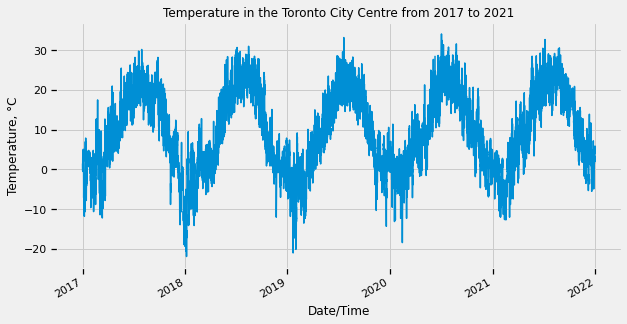

In [8]:
plt = weather_data[['Temp (°C)']].plot(figsize = (9, 5), 
                                          title = 'Temperature in the Toronto City Centre from 2017 to 2021',
                                          ylabel = 'Temperature, °C',
                                          legend = False)

Now we look into the weather data.

In [9]:
weather_data.dtypes

Longitude (x)          float64
Latitude (y)           float64
Station Name            object
Climate ID               int64
Year                     int64
Month                    int64
Day                      int64
Temp (°C)              float64
Temp Flag               object
Dew Point Temp (°C)    float64
Dew Point Temp Flag     object
Rel Hum (%)            float64
Rel Hum Flag            object
Wind Dir (10s deg)     float64
Wind Dir Flag           object
Wind Spd (km/h)        float64
Wind Spd Flag           object
Visibility (km)        float64
Visibility Flag         object
Stn Press (kPa)        float64
Stn Press Flag          object
Hmdx                   float64
Hmdx Flag              float64
Wind Chill             float64
Wind Chill Flag        float64
Weather                 object
Precip. Amount (mm)    float64
Precip. Amount Flag    float64
dtype: object

In [10]:
weather_data_missing = weather_data.isnull().sum(axis = 0).to_frame(name = 'count')
weather_data_missing

,count
Longitude (x),0
Latitude (y),0
Station Name,0
Climate ID,0
Year,0
Month,0
Day,0
Temp (°C),149
Temp Flag,43723
Dew Point Temp (°C),224


In [11]:
weather_data['Weather'].unique().tolist()

[nan,
 'Fog',
 'Rain,Fog',
 'Rain',
 'Snow',
 'Moderate Rain',
 'Moderate Rain,Fog',
 'Haze',
 'Rain,Snow',
 'Freezing Rain,Fog',
 'Snow,Blowing Snow',
 'Heavy Snow',
 'Moderate Snow',
 'Haze,Blowing Snow',
 'Heavy Rain,Fog',
 'Thunderstorms,Rain,Fog',
 'Freezing Rain,Snow',
 'Freezing Rain',
 'Thunderstorms,Rain',
 'Thunderstorms,Moderate Rain,Fog',
 'Thunderstorms,Moderate Rain',
 'Thunderstorms',
 'Thunderstorms,Heavy Rain,Fog',
 'Thunderstorms,Heavy Rain',
 'Thunderstorms,Fog']

We can see that only non-normal/clear weather events are listed. So, when weather_data['Weather'] == NaN, the conditions are clear. Therefore, we would never want to remove rows where weather_data['Weather'] == NaN.

Before finishing cleaning weather data, we would drop some columns that will not assist with our project. Then, we will leave weather_data and address the missingness on a case-by-case basis depending on which columns we're analyzing.

In [12]:
weather_data.drop(columns = ['Temp Flag',
                             'Dew Point Temp (°C)',
                             'Dew Point Temp Flag',
                             'Rel Hum Flag',
                             'Wind Dir (10s deg)',
                             'Wind Dir Flag',
                             'Wind Spd Flag',
                             'Visibility Flag',
                             'Stn Press Flag',
                             'Hmdx',
                             'Hmdx Flag',
                             'Wind Chill',
                             'Wind Chill Flag'], inplace = True, axis = 1)
weather_data.head()


,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Precip. Amount (mm),Precip. Amount Flag
Date/Time,,,,,,,,,,,,,,,
2017-01-01 00:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017,1,1,1.5,69.0,39.0,16.1,99.81,NaN,NaN,NaN
2017-01-01 01:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017,1,1,1.5,67.0,35.0,16.1,100.01,NaN,NaN,NaN
2017-01-01 02:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017,1,1,1.0,68.0,32.0,16.1,100.14,NaN,NaN,NaN
2017-01-01 03:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017,1,1,1.2,67.0,37.0,16.1,100.32,NaN,NaN,NaN
2017-01-01 04:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017,1,1,1.3,66.0,28.0,16.1,100.48,NaN,NaN,NaN


# 1.5 Data Cleaning - Trip Data

In [13]:
# check the data types
for key in trips_data:
    print(key, 'has the following data types:\n', trips_data[key].dtypes)

bike_share_2017-1.csv has the following data types:
 trip_id                    int64
trip_start_time           object
trip_stop_time            object
trip_duration_seconds      int64
from_station_id          float64
from_station_name         object
to_station_id            float64
to_station_name           object
user_type                 object
dtype: object
bike_share_2017-10.csv has the following data types:
 trip_id                    int64
trip_start_time           object
trip_stop_time            object
trip_duration_seconds      int64
from_station_id          float64
from_station_name         object
to_station_id            float64
to_station_name           object
user_type                 object
dtype: object
bike_share_2017-11.csv has the following data types:
 trip_id                    int64
trip_start_time           object
trip_stop_time            object
trip_duration_seconds      int64
from_station_id          float64
from_station_name         object
to_station_id      

There are a lot of inconsistency in data types across all files.

In [14]:
# check for missing values
for key in trips_data:
    print(key, 'has the following missing values:\n', trips_data[key].isnull().sum())

bike_share_2017-1.csv has the following missing values:
 trip_id                  0
trip_start_time          0
trip_stop_time           0
trip_duration_seconds    0
from_station_id          0
from_station_name        0
to_station_id            0
to_station_name          0
user_type                0
dtype: int64
bike_share_2017-10.csv has the following missing values:
 trip_id                       0
trip_start_time               0
trip_stop_time                0
trip_duration_seconds         0
from_station_id          185576
from_station_name             0
to_station_id            185576
to_station_name               0
user_type                     0
dtype: int64
bike_share_2017-11.csv has the following missing values:
 trip_id                       0
trip_start_time               0
trip_stop_time                1
trip_duration_seconds         0
from_station_id          118713
from_station_name             0
to_station_id            118713
to_station_name               1
user_type     

bike_share_2019-12.csv has the following missing values:
 Trip Id                 0
Subscription Id         0
Trip  Duration          0
Start Station Id        0
Start Time              0
Start Station Name      0
End Station Id        140
End Time                0
End Station Name      140
Bike Id                 0
User Type               0
dtype: int64
bike_share_2019-2.csv has the following missing values:
 Trip Id               0
Subscription Id       0
Trip  Duration        0
Start Station Id      0
Start Time            0
Start Station Name    0
End Station Id        0
End Time              0
End Station Name      0
Bike Id               0
User Type             0
dtype: int64
bike_share_2019-3.csv has the following missing values:
 Trip Id               0
Subscription Id       0
Trip  Duration        0
Start Station Id      0
Start Time            0
Start Station Name    0
End Station Id        0
End Time              0
End Station Name      0
Bike Id               0
User Type   

bike_share_2021-5.csv has the following missing values:
 Trip Id                 0
Trip  Duration          0
Start Station Id        0
Start Time              0
Start Station Name      0
End Station Id        145
End Time                0
End Station Name      145
Bike Id                 0
User Type               0
dtype: int64
bike_share_2021-6.csv has the following missing values:
 ï»¿Trip Id              0
Trip  Duration          0
Start Station Id        0
Start Time              0
Start Station Name      0
End Station Id        149
End Time                0
End Station Name      149
Bike Id                 0
User Type               0
dtype: int64
bike_share_2021-7.csv has the following missing values:
 ï»¿Trip Id              0
Trip  Duration          0
Start Station Id        0
Start Time              0
Start Station Name      0
End Station Id        284
End Time                0
End Station Name      284
Bike Id                 0
User Type               0
dtype: int64
bike_share

We can see that a lot of files contain missing values, especially in the columns representing station IDs or names.

First we are going to make the column names uniform throughout different years.

In [15]:
for key in trips_data:
    trips_data[key].rename(columns = {'trip_id':'Trip Id',
                                      'trip_duration_seconds':'Trip Duration',
                                      'Trip  Duration':'Trip Duration',
                                      'from_station_id':'Start Station Id',
                                      'trip_start_time':'Start Time',
                                      'from_station_name':'Start Station Name',
                                      'trip_stop_time':'End Time',
                                      'to_station_id':'End Station Id',
                                      'to_station_name':'End Station Name',
                                      'user_type':'User Type',
                                      'ï»¿Trip Id':'Trip Id'}, inplace = True)

trips_data['bike_share_2018-1.csv'].head()

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Time,End Station Id,End Station Name,User Type
0,2383648,393,7018,2018-01-01 05:47 (UTC),Bremner Blvd / Rees St,2018-01-01 05:54 (UTC),7176,Bathurst St / Fort York Blvd,Annual Member
1,2383649,625,7184,2018-01-01 05:52 (UTC),Ossington Ave / College St,2018-01-01 06:03 (UTC),7191,Central Tech (Harbord St),Annual Member
2,2383650,233,7235,2018-01-01 05:55 (UTC),Bay St / College St (West Side) - SMART,2018-01-01 05:59 (UTC),7021,Bay St / Albert St,Annual Member
3,2383651,1138,7202,2018-01-01 05:57 (UTC),Queen St W / York St (City Hall),2018-01-01 06:16 (UTC),7020,Phoebe St / Spadina Ave,Annual Member
4,2383652,703,7004,2018-01-01 06:00 (UTC),University Ave / Elm St,2018-01-01 06:12 (UTC),7060,Princess St / Adelaide St E,Annual Member


Next, we'll drop the "Bike Id" and "Subscription Id" columns as they will not be used in the analysis.

In [16]:
for key in trips_data:
    if 'Subscription Id' in trips_data[key].columns:
        trips_data[key].drop(columns=['Subscription Id'], inplace=True, axis=1)
    
    if 'Bike Id' in trips_data[key].columns:
        trips_data[key].drop(columns=['Bike Id'], inplace=True, axis=1)

trips_data['bike_share_2019-10.csv'].head()

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,User Type
0,6794858,692,7418,01/10/2019 00:00:00 (EST),College Park - Yonge St Entrance,7463.0,01/10/2019 00:11:00 (EST),Adelaide St W / Brant St,Annual Member
1,6794859,1899,7049,01/10/2019 00:00:00 (EST),Queen St W / Portland St,7292.0,01/10/2019 00:32:00 (EST),Granby St / Church St - SMART,Casual Member
2,6794860,509,7426,01/10/2019 00:00:00 (EST),Fleet St / Garrison Rd (Fort York),7160.0,01/10/2019 00:09:00 (EST),King St W / Tecumseth St,Casual Member
3,6794861,1219,7382,01/10/2019 00:02:00 (EST),Simcoe St / Adelaide St W,7120.0,01/10/2019 00:22:00 (EST),Gerrard St E / River St,Casual Member
4,6794862,650,7217,01/10/2019 00:02:00 (EST),Soho St / Queen St W,7509.0,01/10/2019 00:13:00 (EST),Ontario St / King St E,Annual Member


And we reorder the columns to make them consistent.

In [17]:
for key in trips_data:
    trips_data[key] = trips_data[key][['Trip Id', 
                                       'Trip Duration', 
                                       'Start Station Id', 
                                       'Start Time', 
                                       'Start Station Name', 
                                       'End Station Id', 
                                       'End Time', 
                                       'End Station Name', 
                                       'User Type']]

We want to verify the column renaming.

In [18]:
print('2017\n{}\n'.format(trips_data['bike_share_2017-1.csv'].columns.tolist()))
print('2018\n{}\n'.format(trips_data['bike_share_2018-1.csv'].columns.tolist()))
print('2019\n{}\n'.format(trips_data['bike_share_2019-1.csv'].columns.tolist()))
print('2020\n{}\n'.format(trips_data['bike_share_2020-1.csv'].columns.tolist()))
print('2021\n{}\n'.format(trips_data['bike_share_2021-1.csv'].columns.tolist()))

2017
['Trip Id', 'Trip Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'User Type']

2018
['Trip Id', 'Trip Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'User Type']

2019
['Trip Id', 'Trip Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'User Type']

2020
['Trip Id', 'Trip Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'User Type']

2021
['Trip Id', 'Trip Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'User Type']



Now, we are going to work on the columns related to time.

In [19]:
for key in trips_data:
    print(trips_data[key]['Start Time'][0], type(trips_data[key]['Start Time'][0]), trips_data[key]['End Time'][0], type(trips_data[key]['End Time'][0]))


2017-01-01 05:03 (UTC) <class 'str'> 2017-01-01 05:08 (UTC) <class 'str'>
2017-10-01 05:00 (UTC) <class 'str'> 2017-10-01 05:14 (UTC) <class 'str'>
2017-11-01 05:00 (UTC) <class 'str'> 2017-11-01 05:06 (UTC) <class 'str'>
2017-01-01 01:00 (UTC) <class 'str'> 2017-01-01 01:03 (UTC) <class 'str'>
2017-02-01 05:11 (UTC) <class 'str'> 2017-02-01 05:14 (UTC) <class 'str'>
2017-03-01 05:01 (UTC) <class 'str'> 2017-03-01 05:50 (UTC) <class 'str'>
2017-04-01 05:02 (UTC) <class 'str'> 2017-04-01 05:19 (UTC) <class 'str'>
2017-05-01 05:09 (UTC) <class 'str'> 2017-05-01 05:40 (UTC) <class 'str'>
2017-06-01 05:00 (UTC) <class 'str'> 2017-06-01 05:09 (UTC) <class 'str'>
2017-07-01 05:00 (UTC) <class 'str'> 2017-07-01 05:15 (UTC) <class 'str'>
2017-08-01 05:00 (UTC) <class 'str'> 2017-08-01 05:04 (UTC) <class 'str'>
2017-09-01 05:00 (UTC) <class 'str'> 2017-09-01 05:15 (UTC) <class 'str'>
2018-01-01 05:47 (UTC) <class 'str'> 2018-01-01 05:54 (UTC) <class 'str'>
2018-10-01 05:01 (UTC) <class 'str'> 2

When checking for missing value, we notice that some trips are missing the start or end time. We would remove those trips.

In [20]:
for key in trips_data:
    trips_data[key] = trips_data[key][(trips_data[key]['Start Time'].notna()) & (trips_data[key]['End Time'].notna())]
    print(key, 'has the following missing values:\n', trips_data[key].isnull().sum())

bike_share_2017-1.csv has the following missing values:
 Trip Id               0
Trip Duration         0
Start Station Id      0
Start Time            0
Start Station Name    0
End Station Id        0
End Time              0
End Station Name      0
User Type             0
dtype: int64
bike_share_2017-10.csv has the following missing values:
 Trip Id                    0
Trip Duration              0
Start Station Id      185576
Start Time                 0
Start Station Name         0
End Station Id        185576
End Time                   0
End Station Name           0
User Type                  0
dtype: int64
bike_share_2017-11.csv has the following missing values:
 Trip Id                    0
Trip Duration              0
Start Station Id      118712
Start Time                 0
Start Station Name         0
End Station Id        118712
End Time                   0
End Station Name           0
User Type                  0
dtype: int64
bike_share_2017-12.csv has the following missing v

bike_share_2019-4.csv has the following missing values:
 Trip Id               0
Trip Duration         0
Start Station Id      0
Start Time            0
Start Station Name    0
End Station Id        0
End Time              0
End Station Name      0
User Type             0
dtype: int64
bike_share_2019-5.csv has the following missing values:
 Trip Id               0
Trip Duration         0
Start Station Id      0
Start Time            0
Start Station Name    0
End Station Id        0
End Time              0
End Station Name      0
User Type             0
dtype: int64
bike_share_2019-6.csv has the following missing values:
 Trip Id               0
Trip Duration         0
Start Station Id      0
Start Time            0
Start Station Name    0
End Station Id        1
End Time              0
End Station Name      1
User Type             0
dtype: int64
bike_share_2019-7.csv has the following missing values:
 Trip Id               0
Trip Duration         0
Start Station Id      0
Start Time   

bike_share_2021-9.csv has the following missing values:
 Trip Id                 0
Trip Duration           0
Start Station Id        0
Start Time              0
Start Station Name    716
End Station Id        184
End Time                0
End Station Name      909
User Type               0
dtype: int64


Also, We saw that start and end times in 2017 and 2018 were recorded in UTC timezone, and we should localize it to EST. Plus, data is now of type str instead of datetime object, we should change it too.

In [21]:
import pytz
from datetime import datetime

for key in trips_data:
    trips_data[key]['Start Time'] = trips_data[key]['Start Time'].map(lambda x: x.split('(')[0])
    trips_data[key]['End Time'] = trips_data[key]['End Time'].map(lambda x: x.split('(')[0])
    
    trips_data[key]['Start Time'] = pd.to_datetime(trips_data[key]['Start Time'])
    trips_data[key]['End Time'] = pd.to_datetime(trips_data[key]['End Time'])
    
    time_zone_est = pytz.timezone('EST')
    
    if (('2017' in key) | ('2018' in key)):
        time_zone_current = pytz.timezone('UTC')
        trips_data[key]['Start Time'] = list(map(lambda t: t.tz_localize(time_zone_current).tz_convert(time_zone_est), trips_data[key]['Start Time']))
        trips_data[key]['End Time'] = list(map(lambda t: t.tz_localize(time_zone_current).tz_convert(time_zone_est), trips_data[key]['End Time']))

    if (('2019' in key) | ('2020' in key) | ('2021' in key)):
        trips_data[key]['Start Time'] = list(map(lambda t: t.tz_localize(time_zone_est), trips_data[key]['Start Time']))
        trips_data[key]['End Time'] = list(map(lambda t: t.tz_localize(time_zone_est), trips_data[key]['End Time']))
    
trips_data['bike_share_2018-10.csv'].head()

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,User Type
0,4158592,749,7061,2018-10-01 00:01:00-05:00,Dalton Rd / Bloor St W,7042,2018-10-01 00:14:00-05:00,Sherbourne St / Wellesley St E,Annual Member
1,4158593,433,7003,2018-10-01 00:06:00-05:00,Madison Ave / Bloor St W,7280,2018-10-01 00:13:00-05:00,Charles St E / Jarvis St - SMART,Annual Member
2,4158594,285,7024,2018-10-01 00:14:00-05:00,Dundonald St / Church St,7028,2018-10-01 00:19:00-05:00,Gould St / Mutual St,Annual Member
3,4158595,150,7190,2018-10-01 00:16:00-05:00,St. George St / Hoskin Ave,7161,2018-10-01 00:18:00-05:00,Beverley St / College St,Annual Member
4,4158596,744,7265,2018-10-01 00:21:00-05:00,Wallace Ave / Symington Ave - SMART,7136,2018-10-01 00:33:00-05:00,Queen St W / Close Ave,Annual Member


Now, we combine the dataframes to one master dataframe.

In [22]:
trips_data_total = pd.concat(trips_data.values(), ignore_index = True)
trips_data_total.head()

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,User Type
0,712441,274,7006.0,2017-01-01 00:03:00-05:00,Bay St / College St (East Side),7021.0,2017-01-01 00:08:00-05:00,Bay St / Albert St,Member
1,712442,538,7046.0,2017-01-01 00:03:00-05:00,Niagara St / Richmond St W,7147.0,2017-01-01 00:12:00-05:00,King St W / Fraser Ave,Member
2,712443,992,7048.0,2017-01-01 00:05:00-05:00,Front St / Yonge St (Hockey Hall of Fame),7089.0,2017-01-01 00:22:00-05:00,Church St / Wood St,Member
3,712444,1005,7177.0,2017-01-01 00:09:00-05:00,East Liberty St / Pirandello St,7202.0,2017-01-01 00:26:00-05:00,Queen St W / York St (City Hall),Member
4,712445,645,7203.0,2017-01-01 00:14:00-05:00,Bathurst St / Queens Quay W,7010.0,2017-01-01 00:25:00-05:00,King St W / Spadina Ave,Member


Next, to remove any entries from trips_data_all which have the same "Trip Id":

In [23]:
trips_data_total = trips_data_total.drop_duplicates(subset=['Trip Id'], keep = 'first')

Outliers in your datasets can be both good and bad. One the one hand, they may contain important information while on the other hand, they skew your visualizations and may bias your models.

We now look at the summary statistics for trips_data.

In [24]:
trips_data_total.describe()

,Trip Id,Trip Duration,Start Station Id,End Station Id
count,1.219547e+07,1.219547e+07,1.116858e+07,1.116495e+07
mean,7.634228e+06,1.059844e+03,7.211747e+03,7.210408e+03
std,4.011646e+06,1.002381e+04,1.648741e+02,1.642017e+02
min,7.123820e+05,0.000000e+00,7.000000e+03,7.000000e+03
25%,4.155155e+06,4.450000e+02,7.062000e+03,7.062000e+03
50%,7.614266e+06,7.340000e+02,7.184000e+03,7.183000e+03
75%,1.110744e+07,1.158000e+03,7.323000e+03,7.321000e+03
max,1.463520e+07,1.240378e+07,7.684000e+03,7.684000e+03


The min and max values seem implausible. A trip cannot last 0 seconds and its unlikely that a trip lasted for 1.240378e+07 seconds. We can see that the average 'Trip Duration' is roughly 17.7 minutes.

We've been told by Bike Share Toronto that trips lasting less than 1 minute can be considered false trips. So we will remove all trips from trips_data with a duration less than 60 seconds.

In [25]:
trips_data_total = trips_data_total.drop(trips_data_total[trips_data_total['Trip Duration'] < 60].index)

Next, remove any 'Trip Duration' values less than Q1 - 1.5 * IQR and greater than Q3 + 1.5 * IQR.

In [26]:
Q1 = trips_data_total['Trip Duration'].quantile(0.25)
Q3 = trips_data_total['Trip Duration'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

trips_data_total = trips_data_total.drop(trips_data_total[(trips_data_total['Trip Duration'] < lower_limit) | (trips_data_total['Trip Duration'] > upper_limit)].index)

With this, we can plot a histogram + density plot of the 'Trip Duration'.

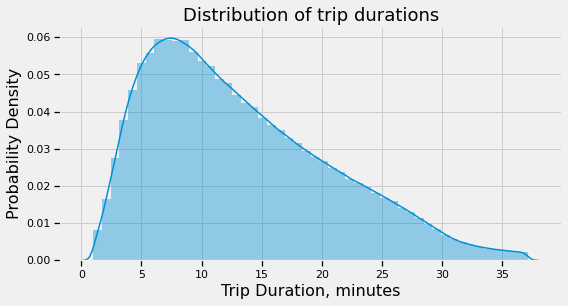

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.title('Distribution of trip durations', fontsize=18)

trips_data_total['Trip Duration'] = trips_data_total['Trip Duration'] / 60

plot_trip_duration = sns.distplot(trips_data_total['Trip Duration'], rug=False)

plt.xlabel('Trip Duration, minutes', fontsize = 16)
plt.ylabel('Probability Density', fontsize = 16)
plt.show()

The diagram makes sense, so we can move on.
To facilitate an analysis of the effect of weather on ridership, we must merge weather_data and trips_data_total.

The output of the merge would be called data_merged. We use the 'Start Time' of the rides to merge.

Because trips_data datetimes contain information down to the minute, while weather_data is reported every hour. Thus, we must merge based on a common year, month, day, hour.

In [176]:
trips_data_total['merge_time'] = trips_data_total['Start Time'].dt.floor('H')
weather_data['merge_time'] = weather_data.index

data_merged = trips_data_total.merge(right = weather_data, how = 'left', on = 'merge_time' )

# View DataFrame
data_merged.head()

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,User Type,merge_time,...,Month,Day,Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Precip. Amount (mm),Precip. Amount Flag
0,712441,4.566667,7006.0,2017-01-01 00:03:00-05:00,Bay St / College St (East Side),7021.0,2017-01-01 00:08:00-05:00,Bay St / Albert St,Member,2017-01-01 00:00:00-05:00,...,1.0,1.0,1.5,69.0,39.0,16.1,99.81,NaN,NaN,NaN
1,712442,8.966667,7046.0,2017-01-01 00:03:00-05:00,Niagara St / Richmond St W,7147.0,2017-01-01 00:12:00-05:00,King St W / Fraser Ave,Member,2017-01-01 00:00:00-05:00,...,1.0,1.0,1.5,69.0,39.0,16.1,99.81,NaN,NaN,NaN
2,712443,16.533333,7048.0,2017-01-01 00:05:00-05:00,Front St / Yonge St (Hockey Hall of Fame),7089.0,2017-01-01 00:22:00-05:00,Church St / Wood St,Member,2017-01-01 00:00:00-05:00,...,1.0,1.0,1.5,69.0,39.0,16.1,99.81,NaN,NaN,NaN
3,712444,16.750000,7177.0,2017-01-01 00:09:00-05:00,East Liberty St / Pirandello St,7202.0,2017-01-01 00:26:00-05:00,Queen St W / York St (City Hall),Member,2017-01-01 00:00:00-05:00,...,1.0,1.0,1.5,69.0,39.0,16.1,99.81,NaN,NaN,NaN
4,712445,10.750000,7203.0,2017-01-01 00:14:00-05:00,Bathurst St / Queens Quay W,7010.0,2017-01-01 00:25:00-05:00,King St W / Spadina Ave,Member,2017-01-01 00:00:00-05:00,...,1.0,1.0,1.5,69.0,39.0,16.1,99.81,NaN,NaN,NaN


clean start station and end station name to a unique name, convert start and end station id to integer.

In [29]:
def clean_station_name(colname):
    def _clean_name(df):
        firstName = df[colname].iloc[0]
        df[colname] = df[colname].transform(lambda _: firstName)
        return df
    return _clean_name

data_merged = data_merged.groupby(['Start Station Id']).apply(clean_station_name('Start Station Name'))
data_merged = data_merged.groupby(['End Station Id']).apply(clean_station_name('End Station Name'))
data_merged = data_merged.astype({'Start Station Id': 'int', 'End Station Id': 'int'})

# 2.1 Data Analysis - Bike Path

Drop all the rows without a valid station ID and station name, put it in a different dataframe named data_station

In [30]:
data_station = data_merged.dropna(subset=['Start Station Id', 'Start Station Name', 'End Station Id', 'End Station Name'])
data_station.head()

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,User Type,merge_time,...,Month,Day,Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Precip. Amount (mm),Precip. Amount Flag
0,712441,4.566667,7006,2017-01-01 00:03:00-05:00,Bay St / College St (East Side),7021,2017-01-01 00:08:00-05:00,Bay St / Albert St,Member,2017-01-01 00:00:00-05:00,...,1.0,1.0,1.5,69.0,39.0,16.1,99.81,NaN,NaN,NaN
1,712442,8.966667,7046,2017-01-01 00:03:00-05:00,Niagara St / Richmond St W,7147,2017-01-01 00:12:00-05:00,King St W / Fraser Ave,Member,2017-01-01 00:00:00-05:00,...,1.0,1.0,1.5,69.0,39.0,16.1,99.81,NaN,NaN,NaN
2,712443,16.533333,7048,2017-01-01 00:05:00-05:00,Front St / Yonge St (Hockey Hall of Fame),7089,2017-01-01 00:22:00-05:00,Church St / Wood St,Member,2017-01-01 00:00:00-05:00,...,1.0,1.0,1.5,69.0,39.0,16.1,99.81,NaN,NaN,NaN
3,712444,16.750000,7177,2017-01-01 00:09:00-05:00,East Liberty St / Pirandello St,7202,2017-01-01 00:26:00-05:00,Queen St W / York St (City Hall),Member,2017-01-01 00:00:00-05:00,...,1.0,1.0,1.5,69.0,39.0,16.1,99.81,NaN,NaN,NaN
4,712445,10.750000,7203,2017-01-01 00:14:00-05:00,Bathurst St / Queens Quay W,7010,2017-01-01 00:25:00-05:00,King St W / Spadina Ave,Member,2017-01-01 00:00:00-05:00,...,1.0,1.0,1.5,69.0,39.0,16.1,99.81,NaN,NaN,NaN


check the number of null in the station data frame

In [31]:
print(data_station.isnull().sum())

Trip Id                       0
Trip Duration                 0
Start Station Id              0
Start Time                    0
Start Station Name            0
End Station Id                0
End Time                      0
End Station Name              0
User Type                     0
merge_time                    0
Longitude (x)                58
Latitude (y)                 58
Station Name                 58
Climate ID                   58
Year                         58
Month                        58
Day                          58
Temp (°C)                 51426
Rel Hum (%)               72314
Wind Spd (km/h)           27312
Visibility (km)           28015
Stn Press (kPa)           51520
Weather                 9754313
Precip. Amount (mm)    10501140
Precip. Amount Flag    10646989
dtype: int64


pair start station and end station as a O-D pair represent the path of the trip

In [32]:
data_station['Path'] = data_station['Start Station Id'].astype(str).str.cat(data_station['End Station Id'].astype(str), sep='-')
data_station.head()

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,User Type,merge_time,...,Day,Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Precip. Amount (mm),Precip. Amount Flag,Path
0,712441,4.566667,7006,2017-01-01 00:03:00-05:00,Bay St / College St (East Side),7021,2017-01-01 00:08:00-05:00,Bay St / Albert St,Member,2017-01-01 00:00:00-05:00,...,1.0,1.5,69.0,39.0,16.1,99.81,NaN,NaN,NaN,7006-7021
1,712442,8.966667,7046,2017-01-01 00:03:00-05:00,Niagara St / Richmond St W,7147,2017-01-01 00:12:00-05:00,King St W / Fraser Ave,Member,2017-01-01 00:00:00-05:00,...,1.0,1.5,69.0,39.0,16.1,99.81,NaN,NaN,NaN,7046-7147
2,712443,16.533333,7048,2017-01-01 00:05:00-05:00,Front St / Yonge St (Hockey Hall of Fame),7089,2017-01-01 00:22:00-05:00,Church St / Wood St,Member,2017-01-01 00:00:00-05:00,...,1.0,1.5,69.0,39.0,16.1,99.81,NaN,NaN,NaN,7048-7089
3,712444,16.750000,7177,2017-01-01 00:09:00-05:00,East Liberty St / Pirandello St,7202,2017-01-01 00:26:00-05:00,Queen St W / York St (City Hall),Member,2017-01-01 00:00:00-05:00,...,1.0,1.5,69.0,39.0,16.1,99.81,NaN,NaN,NaN,7177-7202
4,712445,10.750000,7203,2017-01-01 00:14:00-05:00,Bathurst St / Queens Quay W,7010,2017-01-01 00:25:00-05:00,King St W / Spadina Ave,Member,2017-01-01 00:00:00-05:00,...,1.0,1.5,69.0,39.0,16.1,99.81,NaN,NaN,NaN,7203-7010


sort the busiest path that accomodate the most trips

In [33]:
data_path = data_station.groupby(['Path','Start Station Id','End Station Id','Start Station Name','End Station Name']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)

In [34]:
data_path.sort_values(by='counts', ascending=False)

,Path,Start Station Id,End Station Id,Start Station Name,End Station Name,counts
71042,7171-7171,7171,7171,Ontario Place Blvd / Remembrance Dr,Ontario Place Blvd / Remembrance Dr,9246
133545,7354-7354,7354,7354,Tommy Thompson Park (Leslie Street Spit),Tommy Thompson Park (Leslie Street Spit),8731
130329,7344-7354,7344,7354,Cherry Beach,Tommy Thompson Park (Leslie Street Spit),7145
72581,7175-7175,7175,7175,HTO Park (Queen's Quay W),HTO Park (Queen's Quay W),6860
114690,7288-7288,7288,7288,Humber Bay Shores Park West,Humber Bay Shores Park West,6504
...,...,...,...,...,...,...
22405,7048-7084,7048,7084,Front St / Yonge St (Hockey Hall of Fame),Stephenson Ave / Main St,1
34134,7074-7571,7074,7571,Spadina Ave / Sussex Ave,Highfield Rd / Gerrard St E,1
34131,7074-7568,7074,7568,Spadina Ave / Sussex Ave,Jameson Ave / Queen St W,1
144467,7385-7247,7385,7247,20 Charles St E,Howard Park Ave / Dundas St W - SMART,1


We notice that lots of trips are made from one station to the same station, trip duration less than 1 minutes has been droped from the data cleaning stage. The average of the trip durations made by the same orgin and destination station is shown below.

In [35]:
#check duration of the same station trips
same_station_duration = data_station[data_station['Start Station Id']==data_station['End Station Id']][['Start Station Id', 'End Station Id', 'Trip Duration']].groupby('Start Station Id').mean().sort_values(by='Trip Duration', ascending=False)
same_station_duration
# same_station['count'] = data_station[data_station['Start Station Id']==data_station['End Station Id']]['count']

,End Station Id,Trip Duration
Start Station Id,,
7606,7606.0,24.052029
7616,7616.0,24.029222
7532,7532.0,23.958333
7395,7395.0,23.823252
7614,7614.0,23.741397
...,...,...
7549,7549.0,7.123293
7675,7675.0,6.810000
7394,7394.0,2.966667


Count the trips that start and end with the same station

In [36]:
same_station=data_path[data_path['Start Station Id']==data_path['End Station Id']][['Start Station Id', 'End Station Id', 'counts']].groupby('Start Station Id').mean().sort_values(by='counts', ascending=False).drop(columns = ['End Station Id'])
same_station

,counts
Start Station Id,
7171,9246.0
7354,8731.0
7175,6860.0
7288,6504.0
7242,5876.0
...,...
7677,8.0
7532,6.0
7394,2.0


Add trip duration

In [37]:
same_station = same_station.merge(same_station_duration['Trip Duration'], how='left', right_on = 'Start Station Id',left_on='Start Station Id')
same_station


,counts,Trip Duration
Start Station Id,,
7171,9246.0,20.394926
7354,8731.0,23.446932
7175,6860.0,18.894825
7288,6504.0,21.375231
7242,5876.0,17.835815
...,...,...
7677,8.0,9.854167
7532,6.0,23.958333
7394,2.0,2.966667


Add coordinate to those trips

In [38]:
#add coordinates to it 
same_station = same_station.merge(stations[['station_id','name','lat', 'lon']], how='left', right_on='station_id', left_on='Start Station Id')
same_station.head()

,counts,Trip Duration,station_id,name,lat,lon
0,9246.0,20.394926,7171.0,Ontario Place Blvd / Lake Shore Blvd W (East),43.632244,-79.410810
1,8731.0,23.446932,7354.0,Tommy Thompson Park (Leslie Street Spit),43.645836,-79.320889
2,6860.0,18.894825,7175.0,HTO Park (Queens Quay W),43.637960,-79.387502
3,6504.0,21.375231,7288.0,Humber Bay Shores Park West,43.622443,-79.480284
4,5876.0,17.835815,7242.0,Lake Shore Blvd W / Ontario Dr,43.630254,-79.420317


The possible bike path of the trip cannot be estimated using the same orgin and destination station. Thus, we drop these rows. For trips made between different stations：

In [39]:
data_path = data_path.drop(data_path[data_path['Start Station Id'] == data_path['End Station Id']].index)
data_path.head()

,Path,Start Station Id,End Station Id,Start Station Name,End Station Name,counts
130329,7344-7354,7344,7354,Cherry Beach,Tommy Thompson Park (Leslie Street Spit),7145
82149,7203-7076,7203,7076,Bathurst St / Queens Quay W,York St / Queens Quay W,6293
133538,7354-7344,7354,7344,Tommy Thompson Park (Leslie Street Spit),Cherry Beach,6284
27218,7059-7033,7059,7033,Front St W / Blue Jays Way,Union Station,5678
34740,7076-7203,7076,7203,York St / Queens Quay W,Bathurst St / Queens Quay W,5558


merge orgin and destination coordinate columes to the path dataframe

In [40]:
data_path = data_path.merge(stations[['station_id', 'lat', 'lon']], how='left', right_on='station_id', left_on='Start Station Id').rename(columns={'lat': 'start_station_lat', 'lon': 'start_station_lon'}).drop(columns=["station_id"])
data_path.head()

,Path,Start Station Id,End Station Id,Start Station Name,End Station Name,counts,start_station_lat,start_station_lon
0,7344-7354,7344,7354,Cherry Beach,Tommy Thompson Park (Leslie Street Spit),7145,43.637764,-79.345359
1,7203-7076,7203,7076,Bathurst St / Queens Quay W,York St / Queens Quay W,6293,43.635492,-79.398253
2,7354-7344,7354,7344,Tommy Thompson Park (Leslie Street Spit),Cherry Beach,6284,43.645836,-79.320889
3,7059-7033,7059,7033,Front St W / Blue Jays Way,Union Station,5678,43.643473,-79.390477
4,7076-7203,7076,7203,York St / Queens Quay W,Bathurst St / Queens Quay W,5558,43.640132,-79.380464


In [41]:
data_path = data_path.merge(stations[['station_id', 'lat', 'lon']], how='left', right_on='station_id', left_on='End Station Id').rename(columns={'lat': 'end_station_lat', 'lon': 'end_station_lon'}).drop(columns=["station_id"])
data_path

,Path,Start Station Id,End Station Id,Start Station Name,End Station Name,counts,start_station_lat,start_station_lon,end_station_lat,end_station_lon
0,7344-7354,7344,7354,Cherry Beach,Tommy Thompson Park (Leslie Street Spit),7145,43.637764,-79.345359,43.645836,-79.320889
1,7203-7076,7203,7076,Bathurst St / Queens Quay W,York St / Queens Quay W,6293,43.635492,-79.398253,43.640132,-79.380464
2,7354-7344,7354,7344,Tommy Thompson Park (Leslie Street Spit),Cherry Beach,6284,43.645836,-79.320889,43.637764,-79.345359
3,7059-7033,7059,7033,Front St W / Blue Jays Way,Union Station,5678,43.643473,-79.390477,43.645609,-79.380386
4,7076-7203,7076,7203,York St / Queens Quay W,Bathurst St / Queens Quay W,5558,43.640132,-79.380464,43.635492,-79.398253
...,...,...,...,...,...,...,...,...,...,...
210263,7267-7117,7267,7117,Dundas St E / Pembroke St - SMART,Castle Frank Station,1,43.658295,-79.372346,43.674689,-79.367020
210264,7093-7467,7093,7467,Danforth Ave / Gough Ave,Lower Simcoe St / Bremner Blvd,1,43.678401,-79.346289,43.642830,-79.384090
210265,7469-7174,7469,7174,Wellington St W / York St,Bloor St W / Dundas St W,1,43.646734,-79.383010,43.656389,-79.451667
210266,7469-7178,7469,7178,Wellington St W / York St,Dundas St W / Edna Ave,1,43.646734,-79.383010,43.657192,-79.452559


import neighbourhood data and bike path data, transform them to EPSG:26917

In [42]:
import geopandas as gpd

In [43]:
neighbourhoods = gpd.read_file('toronto_neighbourhoods.shp')
neighbourhoods = neighbourhoods[['FIELD_8','geometry']]
neighbourhoods.rename(columns = {'FIELD_8': 'name'}, inplace=True)
neighbourhoods['name'] = neighbourhoods['name'].apply(lambda text: text.split('(')[0])

In [44]:
bike_lanes = gpd.read_file('bikeway_network.shp')
bike_lanes = bike_lanes[['LF_NAME', 'SEG_TYPE', 'length', 'geometry']]
bike_lanes = bike_lanes.rename(columns={'LF_NAME': 'name', 'SEG_TYPE': 'route_type'})
bike_lanes = bike_lanes[bike_lanes['route_type'] == 'bike lane']

In [45]:
neighbourhoods = neighbourhoods.to_crs(epsg=26917)
bike_lanes = bike_lanes.to_crs(epsg=26917)

convert station loactions DataFrame to a GeoDataFrame and set to EPSG:26917

In [46]:
geometry_start = gpd.points_from_xy(data_path.start_station_lon, data_path.start_station_lat)
geometry_end = gpd.points_from_xy(data_path.end_station_lon, data_path.end_station_lat)
data_path_gdf = gpd.GeoDataFrame(data_path, geometry=geometry_start)
data_path_gdf.set_crs(epsg=4326, inplace=True)
data_path_gdf = data_path_gdf.to_crs(epsg=26917)

In [47]:
data_path_gdf.rename(columns = {'geometry':'start_station_geometry'}, inplace=True)

In [48]:
data_path_gdf.rename(columns = {'geometry':'end_station_geometry'}, inplace=True)
data_path_gdf.head()

,Path,Start Station Id,End Station Id,Start Station Name,End Station Name,counts,start_station_lat,start_station_lon,end_station_lat,end_station_lon,start_station_geometry
0,7344-7354,7344,7354,Cherry Beach,Tommy Thompson Park (Leslie Street Spit),7145,43.637764,-79.345359,43.645836,-79.320889,POINT (633464.785 4832971.581)
1,7203-7076,7203,7076,Bathurst St / Queens Quay W,York St / Queens Quay W,6293,43.635492,-79.398253,43.640132,-79.380464,POINT (629203.133 4832635.545)
2,7354-7344,7354,7344,Tommy Thompson Park (Leslie Street Spit),Cherry Beach,6284,43.645836,-79.320889,43.637764,-79.345359,POINT (635420.433 4833907.679)
3,7059-7033,7059,7033,Front St W / Blue Jays Way,Union Station,5678,43.643473,-79.390477,43.645609,-79.380386,POINT (629813.193 4833534.073)
4,7076-7203,7076,7203,York St / Queens Quay W,Bathurst St / Queens Quay W,5558,43.640132,-79.380464,43.635492,-79.398253,POINT (630628.023 4833178.723)


plot neighbourhood, bike lanes and station data, the station count is the sum of the in and out of the trips. (station used as start station + stataion used as the end station)

In [49]:
data_path_gdf = pd.concat([
    data_path[['Start Station Id', 'start_station_lat', 'start_station_lon', 'counts']].rename(columns={'Start Station Id': 'Station Id', 'start_station_lon': 'lon', 'start_station_lat': 'lat'}),
    data_path[['End Station Id', 'end_station_lat', 'end_station_lon', 'counts']].rename(columns={'End Station Id': 'Station Id', 'end_station_lon': 'lon', 'end_station_lat': 'lat'})
]).groupby('Station Id').agg(
    lat=pd.NamedAgg(column='lat', aggfunc='first'),
    lon=pd.NamedAgg(column='lon', aggfunc='first'),
    counts=pd.NamedAgg(column='counts', aggfunc='sum')
)

data_path_gdf = gpd.GeoDataFrame(data_path_gdf, geometry=gpd.points_from_xy(data_path_gdf.lon, data_path_gdf.lat))
data_path_gdf.set_crs(epsg=4326, inplace=True)
data_path_gdf = data_path_gdf.to_crs(epsg=26917).dropna(subset=['lat', 'lon'])
data_path_gdf.sort_values(by='counts', ascending=False)

,lat,lon,counts,geometry
Station Id,,,,
7076,43.640132,-79.380464,216227,POINT (630628.023 4833178.723)
7016,43.640978,-79.376785,168279,POINT (630922.928 4833278.480)
7203,43.635492,-79.398253,158901,POINT (629203.133 4832635.545)
7033,43.645609,-79.380386,154716,POINT (630622.443 4833787.138)
7242,43.630254,-79.420317,149621,POINT (627434.419 4832019.688)
...,...,...,...,...
7612,43.747854,-79.199327,341,POINT (644978.461 4845443.866)
7624,43.754978,-79.197129,312,POINT (645138.216 4846238.946)
7678,43.773450,-79.500200,189,POINT (620702.414 4847804.044)


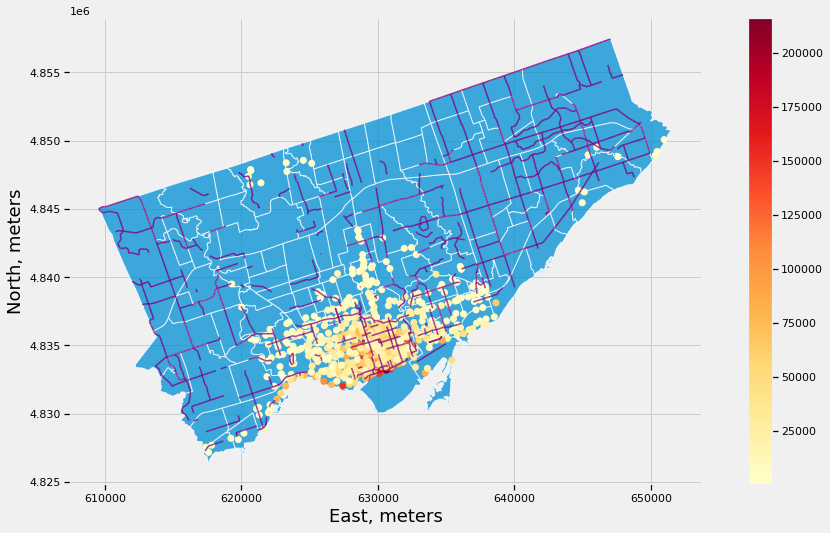

In [50]:
ax = neighbourhoods.plot(figsize=(15, 8), edgecolor='w', alpha=0.75)
data_path_gdf.plot(column='counts', ax=ax, cmap='YlOrRd', label = 'Bike Stations', legend=True)
bike_lanes.plot(ax=ax, color = 'purple', alpha = 0.8, label = 'Bike Lanes')
# plt.legend(fontsize = 16, loc = 2)
plt.xlabel('East, meters', fontsize=18)
plt.ylabel('North, meters', fontsize=18)
plt.show()

plot for same station trips

In [51]:
geometry_same_station = gpd.points_from_xy(same_station.lon, same_station.lat)
same_station_gdf = gpd.GeoDataFrame(same_station, geometry=geometry_same_station)
same_station_gdf.set_crs(epsg=4326, inplace=True)
same_station_gdf = same_station_gdf.to_crs(epsg=26917)

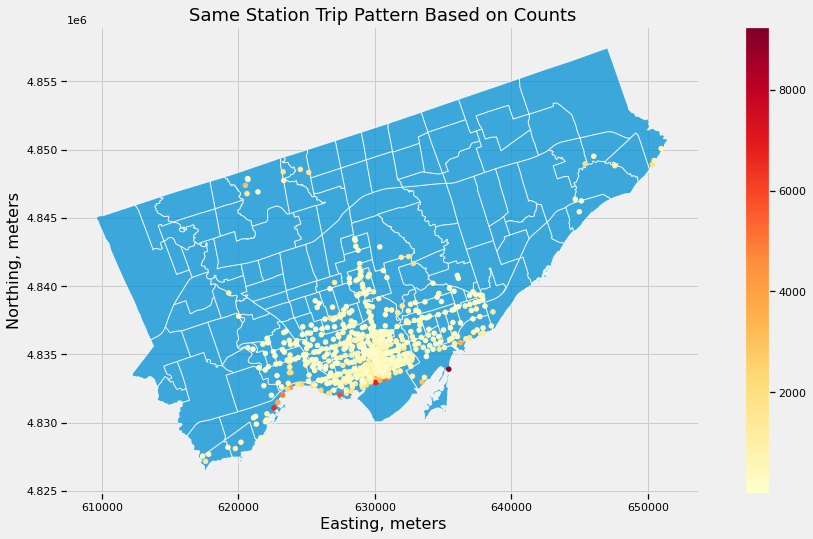

In [52]:
ax = neighbourhoods.plot(figsize=(15, 8), edgecolor='w', alpha=0.75)
same_station_gdf.plot(column='counts', ax=ax, cmap='YlOrRd', label = 'Bike Stations', legend=True, markersize=20)
plt.title('Same Station Trip Pattern Based on Counts', fontsize=18)
plt.xlabel('Easting, meters', fontsize=16)
plt.ylabel('Northing, meters', fontsize=16)
plt.show()

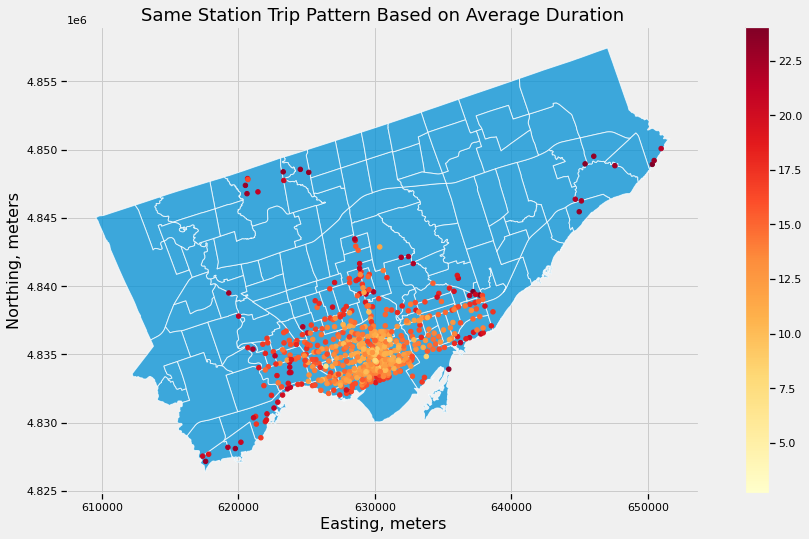

In [53]:
ax = neighbourhoods.plot(figsize=(15, 8), edgecolor='w', alpha=0.75)
same_station_gdf.plot(column='Trip Duration', ax=ax, cmap='YlOrRd', label = 'Bike Stations', legend=True, markersize=20)
plt.title('Same Station Trip Pattern Based on Average Duration', fontsize=18)
plt.xlabel('Easting, meters', fontsize=16)
plt.ylabel('Northing, meters', fontsize=16)
plt.show()

examine the relationship between the distance and the count of the trip

In [54]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [55]:
from geopy.distance import distance

In [56]:
data_path_copy = data_path.dropna(subset=['start_station_lon','start_station_lat','end_station_lon','end_station_lon'])
data_path_copy['coords_1'] = list(zip(data_path_copy['start_station_lon'], data_path_copy['start_station_lat']))
data_path_copy['coords_2'] = list(zip(data_path_copy['end_station_lon'], data_path_copy['end_station_lat']))
 
data_path_copy['Distance'] = data_path_copy.apply(lambda df: distance(df['coords_1'], df['coords_2']).km, axis=1)

In [57]:
data_path_copy = data_path_copy.sort_values(by='Distance', ascending = False)
data_path_copy

,Path,Start Station Id,End Station Id,Start Station Name,End Station Name,counts,start_station_lat,start_station_lon,end_station_lat,end_station_lon,geometry,coords_1,coords_2,Distance
184671,7625-7617,7625,7617,Guildwood GO Station (North),Starspray Ave / Lawrence Ave E,1,43.725467,-79.401154,43.788319,-79.123505,POINT (-79.40115 43.72547),"(-79.40115449999999, 43.7254665)","(-79.123505, 43.788319)",31.028466
184030,7626-7625,7626,7625,Rouge Hill GO Station,Guildwood GO Station (North),2,43.780550,-79.130120,43.725467,-79.401154,POINT (-79.13012 43.78055),"(-79.1301203, 43.7805505)","(-79.40115449999999, 43.7254665)",30.283955
184701,7625-7626,7625,7626,Guildwood GO Station (North),Rouge Hill GO Station,1,43.725467,-79.401154,43.780550,-79.130120,POINT (-79.40115 43.72547),"(-79.40115449999999, 43.7254665)","(-79.1301203, 43.7805505)",30.283955
179588,7616-7625,7616,7625,Waterfront Trail (Rouge Hill),Guildwood GO Station (North),2,43.778015,-79.131911,43.725467,-79.401154,POINT (-79.13191 43.77802),"(-79.131911, 43.778015)","(-79.40115449999999, 43.7254665)",30.082195
189900,7645-7625,7645,7625,University of Toronto Scarborough,Guildwood GO Station (North),1,43.784242,-79.184989,43.725467,-79.401154,POINT (-79.18499 43.78424),"(-79.1849889, 43.7842419)","(-79.40115449999999, 43.7254665)",24.166760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36470,7057-7334,7057,7334,Simcoe St / Wellington St W,Simcoe St / Wellington St North,73,43.645857,-79.385365,43.646218,-79.385505,POINT (-79.38537 43.64586),"(-79.3853654, 43.6458569)","(-79.3855048, 43.6462176)",0.017243
14230,7006-7235,7006,7235,Bay St / College St (East Side),Bay St / College St (West Side) - SMART,168,43.660439,-79.385525,43.660087,-79.385655,POINT (-79.38553 43.66044),"(-79.385525, 43.660439)","(-79.385655, 43.660087)",0.016221
23216,7235-7006,7235,7006,Bay St / College St (West Side) - SMART,Bay St / College St (East Side),114,43.660087,-79.385655,43.660439,-79.385525,POINT (-79.38565 43.66009),"(-79.385655, 43.660087)","(-79.385525, 43.660439)",0.016221
12298,7077-7418,7077,7418,College Park South,College Park - Yonge St Entrance,186,43.659777,-79.382767,43.659880,-79.382790,POINT (-79.38277 43.65978),"(-79.382767, 43.659777)","(-79.38279, 43.65988)",0.003330


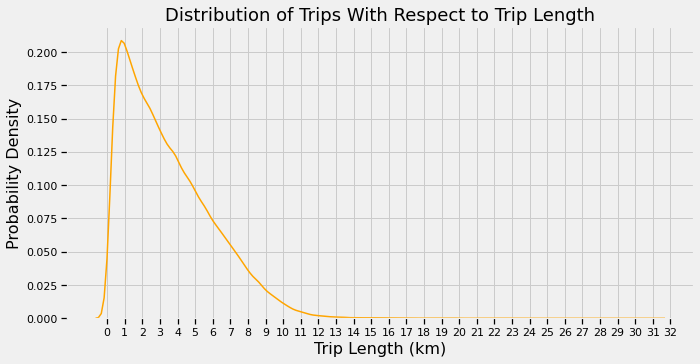

In [58]:
plt.figure(figsize=(10,5))

sns.distplot(data_path_copy['Distance'],color = 'Orange',hist=False)

plt.title('Distribution of Trips With Respect to Trip Length', fontsize = 18)
plt.xlabel('Trip Length (km)', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
plt.xticks(range(0, 33, 1))
plt.show()

examine the hourly ride counts, start time range from 0 to 23 represent 0am to 23pm. Sort the value by the number of rides per hour.

In [59]:
data_hours = data_station.groupby('merge_time').agg(
    rides = pd.NamedAgg(column='merge_time', aggfunc=lambda x: x.count()))
data_hours["Start Time"] = data_hours.index.hour
data_hours = data_hours.groupby("Start Time").mean().sort_values(by='rides', ascending = False)

data_hours.head()

,rides
Start Time,
17,707.261949
18,612.235878
16,543.828057
19,482.200497
15,435.788330


plot the data

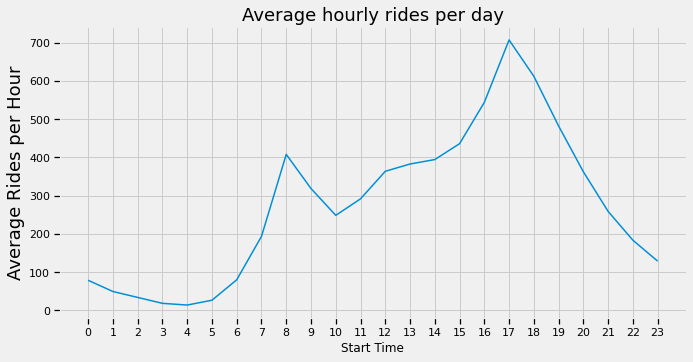

In [60]:
plt.figure(figsize=(10, 5))
plt.title('Average hourly rides per day', fontsize=18)
sns.lineplot(data=data_hours, x=data_hours.index, y='rides')
plt.ylabel('Average Rides per Hour', fontsize=18)
plt.xticks(range(0, 24, 1))
plt.show()

# 2.2 Purpose of Trip 
(Workday vs Non-WorkDay)

examine if the day observed is a workday, True for workdays and False for non-work days


In [61]:
pip install holidays

Note: you may need to restart the kernel to use updated packages.


In [62]:
data_station['day'] = data_station['Start Time'].dt.floor('D')
data_days = data_station.groupby('day').agg(
    rides = pd.NamedAgg(column='day', aggfunc=lambda x: x.count()),
    workday = pd.NamedAgg(column='day', aggfunc=lambda x: bool(len(pd.bdate_range(x.iloc[0], x.iloc[0]))))
).reset_index().rename(columns={'day': 'Start Time'}).set_index('Start Time', drop=True)

data_days.sort_values(by='rides', ascending = False).head(50)
# data_days.head()

,rides,workday
Start Time,,
2021-05-06 00:00:00-05:00,24551,True
2021-05-16 00:00:00-05:00,23920,False
2021-12-06 00:00:00-05:00,23161,True
2021-05-24 00:00:00-05:00,22697,True
2021-05-15 00:00:00-05:00,22190,False
2021-05-30 00:00:00-05:00,22081,False
2021-06-06 00:00:00-05:00,22047,False
2020-06-09 00:00:00-05:00,21939,True
2020-08-08 00:00:00-05:00,21782,False


add holiday data to the data set, make the day non-workday if it is a holiday.

In [63]:
import holidays
ca_holidays = list(holidays.CA(years=range(2017,2022)).keys())
data_days["holiday"] = list(data_days.reset_index("Start Time")["Start Time"].dt.date.isin(ca_holidays))

In [64]:
data_days.head(20)

,rides,workday,holiday
Start Time,,,
2016-12-31 00:00:00-05:00,58,False,False
2017-01-01 00:00:00-05:00,482,False,True
2017-01-02 00:00:00-05:00,826,True,True
2017-01-03 00:00:00-05:00,871,True,False
2017-01-04 00:00:00-05:00,1395,True,False
2017-01-05 00:00:00-05:00,1210,True,False
2017-01-06 00:00:00-05:00,1175,True,False
2017-01-07 00:00:00-05:00,553,False,False
2017-01-08 00:00:00-05:00,485,False,False


In [65]:
data_days['workday'] = (~data_days['holiday']) & data_days['workday']
data_days

,rides,workday,holiday
Start Time,,,
2016-12-31 00:00:00-05:00,58,False,False
2017-01-01 00:00:00-05:00,482,False,True
2017-01-02 00:00:00-05:00,826,False,True
2017-01-03 00:00:00-05:00,871,True,False
2017-01-04 00:00:00-05:00,1395,True,False
...,...,...,...
2021-12-07 00:00:00-05:00,12561,True,False
2021-12-08 00:00:00-05:00,13844,True,False
2021-12-09 00:00:00-05:00,12848,True,False


sort the values in descending order

In [66]:
data_days = data_days.sort_values(by='rides', ascending=False)
data_days

,rides,workday,holiday
Start Time,,,
2021-05-06 00:00:00-05:00,24551,True,False
2021-05-16 00:00:00-05:00,23920,False,False
2021-12-06 00:00:00-05:00,23161,True,False
2021-05-24 00:00:00-05:00,22697,False,True
2021-05-15 00:00:00-05:00,22190,False,False
...,...,...,...
2018-01-01 00:00:00-05:00,243,False,True
2019-01-20 00:00:00-05:00,215,False,False
2017-02-12 00:00:00-05:00,192,False,False


Plot the data and compare the total number of workday and nonworkday rides.

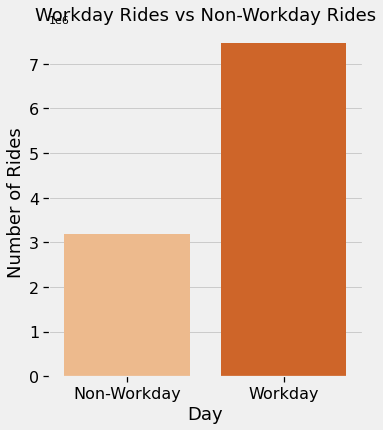

In [67]:
workday_rides = data_days.copy()
workday_rides['workday'] = workday_rides['workday'].transform(lambda x: 'Workday' if x else 'Non-Workday')
workday_rides = workday_rides.groupby('workday').sum()
plt.figure(figsize=(5,6))
plt.title('Workday Rides vs Non-Workday Rides', fontsize = 18)

ax = sns.barplot(x = workday_rides.index, y=workday_rides['rides'], palette = 'Oranges')
                
ax.xaxis.set_tick_params(labelsize = 16)
ax.yaxis.set_tick_params(labelsize = 16)
ax.set_xlabel('Day', fontsize = 18)
ax.set_ylabel('Number of Rides', fontsize = 18)
plt.show()

# 3.0 Relationship between the Bike Share Ridership and the Distance from Bikeshare Stations to Public Transit Stations

In [68]:
# Import 3rd party libraries
import os
import json
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

# 3.1 External Data Input and Cleaning

FRTN_POINTS.shp is a shape file containing geo data of the transit network in Toronto downloaded from the Metrollinx data base.The data set title on the Metrolinx database website is Future Regional Transit Network Shapefile. The description is Geospatial data showing existing and future transit network based on the 2041 Regional Transportation Plan and subsequent updates.

Imported the 'FRTN_POINTS.shp' shape file as a GeoDataFrame and transform the crs to EPSG:4326. Created a new variable called transit_stations and save the GeoDataFrame to it. The data set may only contains the major transit stations in Toronto area. Minor bus stops may not include in the data set.

In [69]:
# Read Transit Station File
transit_stations = gpd.read_file('FRTN_POINTS.shp').to_crs(epsg=4326)

# View GeoDataFrame
transit_stations

,LOCATION_N,STATUS,TECHNOLOGY,NAME,geometry
0,Creditstone,Existing,BRT,Highway 7 West BRT,POINT (-79.51778 43.79573)
1,Keele,Existing,BRT,Highway 7 West BRT,POINT (-79.49941 43.80033)
2,Davis,Existing,BRT,Yonge North BRT,POINT (-79.48036 44.05479)
3,Eagle,Existing,BRT,Yonge North BRT,POINT (-79.47816 44.04544)
4,Mulock,Existing,BRT,Yonge North BRT,POINT (-79.47604 44.03630)
...,...,...,...,...,...
377,Borden,Existing,LRT / BRT,Waterloo ION LRT,POINT (-80.47580 43.44252)
378,Mill,Existing,LRT / BRT,Waterloo ION LRT,POINT (-80.47825 43.43399)
379,Block Line,Existing,LRT / BRT,Waterloo ION LRT,POINT (-80.46229 43.42230)
380,Fairway Station,Existing,LRT / BRT,Waterloo ION LRT,POINT (-80.44323 43.42206)


Figure out how many locations each status has.

In [70]:
transit_stations_grouped = transit_stations.groupby(['STATUS']).agg('count')

transit_stations_grouped

,LOCATION_N,TECHNOLOGY,NAME,geometry
STATUS,,,,
Advancing,37,37,37,37
Existing,216,216,216,216
In Delivery,98,98,98,98
Proposed,31,31,31,31


Only keep the locations with a existing status.

In [71]:
transit_stations_existing = transit_stations[transit_stations['STATUS']=='Existing']
transit_stations_existing=transit_stations_existing.to_crs(epsg=26917)
transit_stations_existing

,LOCATION_N,STATUS,TECHNOLOGY,NAME,geometry
0,Creditstone,Existing,BRT,Highway 7 West BRT,POINT (619243.092 4850252.942)
1,Keele,Existing,BRT,Highway 7 West BRT,POINT (620711.588 4850790.484)
2,Davis,Existing,BRT,Yonge North BRT,POINT (621724.180 4879081.433)
3,Eagle,Existing,BRT,Yonge North BRT,POINT (621919.299 4878046.192)
4,Mulock,Existing,BRT,Yonge North BRT,POINT (622108.327 4877033.170)
...,...,...,...,...,...
377,Borden,Existing,LRT / BRT,Waterloo ION LRT,POINT (542418.484 4810091.672)
378,Mill,Existing,LRT / BRT,Waterloo ION LRT,POINT (542226.240 4809143.111)
379,Block Line,Existing,LRT / BRT,Waterloo ION LRT,POINT (543526.924 4807852.113)
380,Fairway Station,Existing,LRT / BRT,Waterloo ION LRT,POINT (545069.635 4807835.727)


# 3.2 Transit Station Data Visualization

In [72]:
import folium
from folium import Marker

Mark all the transit stations on the map to see if the data is valid for future analysis.

In [73]:
# Create map with all transit stations 
map_1 = folium.Map(location=[43.6426, -79.3871], 
                   tiles='cartodbpositron', 
                   zoom_start=10)
    

# Add points to the map
for idx, row in transit_stations_existing.to_crs(epsg=4326).iterrows():
   
        Marker([row.geometry.y, row.geometry.x], 
               icon=folium.Icon(color='green'),
               popup=row['LOCATION_N'],radius=1,weight=0).add_to(map_1)
map_1

# 3.3 Distance between Bike Stations and Transit Stations Check
## 3.3.1 200 Meters Distance between Bike Stations and Transit Stations Check
### The following steps check if the  bike stations are within 200 meters to a transit station and the way to do this is to create a buffer. 


Add 200 meters buffer to the transit stations.

In [74]:
transit_stations_existing_buffer_200 = transit_stations_existing.buffer(200)
# View GeoDataFrame
transit_stations_existing_buffer_200

0      POLYGON ((619443.092 4850252.942, 619442.129 4...
1      POLYGON ((620911.588 4850790.484, 620910.625 4...
2      POLYGON ((621924.180 4879081.433, 621923.217 4...
3      POLYGON ((622119.299 4878046.192, 622118.336 4...
4      POLYGON ((622308.327 4877033.170, 622307.364 4...
                             ...                        
377    POLYGON ((542618.484 4810091.672, 542617.521 4...
378    POLYGON ((542426.240 4809143.111, 542425.277 4...
379    POLYGON ((543726.924 4807852.113, 543725.961 4...
380    POLYGON ((545269.635 4807835.727, 545268.672 4...
381    POLYGON ((541615.919 4810723.153, 541614.956 4...
Length: 216, dtype: geometry

In [75]:
from folium import GeoJson

In [76]:
# Create map with transit stations with buffer
map_2 = folium.Map(location=[43.6426, -79.3871], 
                   tiles='cartodbpositron', 
                   zoom_start=10)
    
# Plot each polygon on the map
GeoJson(transit_stations_existing_buffer_200.to_crs(epsg=4326)).add_to(map_2)

# Show the map
map_2

Check the geometry in the data_path_gdf, and see if it is epsg=26917.
If not, convert to epsg=26917

In [77]:
data_path_gdf = data_path_gdf.to_crs(epsg=26917)
data_path_gdf

,lat,lon,counts,geometry
Station Id,,,,
7000,43.639832,-79.395954,127046,POINT (629379.266 4833121.140)
7001,43.664964,-79.383550,75066,POINT (630325.358 4835931.809)
7002,43.667333,-79.399429,92836,POINT (629040.059 4836170.077)
7003,43.667158,-79.402761,53904,POINT (628771.800 4836145.462)
7004,43.656518,-79.389099,47472,POINT (629896.208 4834985.048)
...,...,...,...,...
7677,43.684618,-79.392459,1385,POINT (629564.771 4838100.644)
7678,43.773450,-79.500200,189,POINT (620702.414 4847804.044)
7679,43.774100,-79.500500,105,POINT (620676.962 4847875.799)


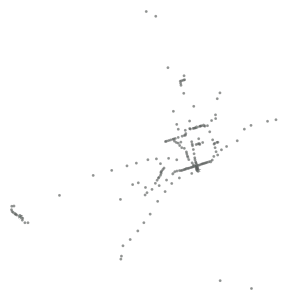

In [78]:
transit_stations_union_200 = transit_stations_existing_buffer_200.geometry.unary_union
transit_stations_union_200

In [79]:
transit_stations_union_200= gpd.GeoDataFrame(geometry=[transit_stations_union_200], crs='EPSG:26917')
transit_stations_union_200.head()

,geometry
0,"MULTIPOLYGON (((591984.281 4789400.910, 591971..."


The following step checks if the bike stations are located with 200m from the transit stations.

In [80]:
data_path_gdf['transit_access_200m'] =data_path_gdf.apply(lambda row: transit_stations_union_200.contains(row['geometry']),axis=1)

# View GeoDataFrame
data_path_gdf

,lat,lon,counts,geometry,transit_access_200m
Station Id,,,,,
7000,43.639832,-79.395954,127046,POINT (629379.266 4833121.140),False
7001,43.664964,-79.383550,75066,POINT (630325.358 4835931.809),True
7002,43.667333,-79.399429,92836,POINT (629040.059 4836170.077),True
7003,43.667158,-79.402761,53904,POINT (628771.800 4836145.462),True
7004,43.656518,-79.389099,47472,POINT (629896.208 4834985.048),False
...,...,...,...,...,...
7677,43.684618,-79.392459,1385,POINT (629564.771 4838100.644),True
7678,43.773450,-79.500200,189,POINT (620702.414 4847804.044),True
7679,43.774100,-79.500500,105,POINT (620676.962 4847875.799),True


### The following several steps calculate the average yearly ridership of bike stations within 200 meters of transit stations and the average yearly ridership of bike stations not within 200 meters of transit stations.

In [81]:
data_path_gdf_count_200 = data_path_gdf.groupby(['transit_access_200m']).agg('count')['counts']
data_path_gdf_count_200

transit_access_200m
False    489
True     110
Name: counts, dtype: int64

In [82]:
data_path_gdf_sum_200 = data_path_gdf.groupby(['transit_access_200m']).agg('sum')['counts']
data_path_gdf_sum_200

transit_access_200m
False    16375120
True      3929296
Name: counts, dtype: int64

In [83]:
average_trip_200 = data_path_gdf_sum_200/data_path_gdf_count_200
average_trip_200

transit_access_200m
False    33486.952965
True     35720.872727
Name: counts, dtype: float64

The result shows us the bike stations within 200 meters of transit stations have 35721 trips per year in average. The bike stations not in 200 meters of transit stations have 33487 trips per year in average. 

## 3.3.2 50/100/350/500/1000 Meters Distance between Bike Stations and Transit Stations Check



### Repeat the previous steps to calculate the average yearly ridership of bike stations within 100 meters of transit stations and the average yearly ridership of bike stations not within 100 meters of transit stations.

In [84]:
transit_stations_existing_buffer_100 = transit_stations_existing.buffer(100)

transit_stations_union_100 = transit_stations_existing_buffer_100.geometry.unary_union

data_path_gdf['transit_access_100m'] =data_path_gdf.apply(lambda row: transit_stations_union_100.contains(row['geometry']),axis=1)

data_path_gdf_count_100 = data_path_gdf.groupby(['transit_access_100m']).agg('count')['counts']

data_path_gdf_sum_100 = data_path_gdf.groupby(['transit_access_100m']).agg('sum')['counts']

average_trip_100 = data_path_gdf_sum_100/data_path_gdf_count_100

average_trip_100

transit_access_100m
False    33988.297491
True     32657.219512
Name: counts, dtype: float64



The result shows us the bike stations within 100 meters of transit stations have 32657 trips per year in average. The bike stations not in 100 meters of transit stations have 33988 trips per year in average. This result represents installing bike stations within 100 meters with transit stations will have slightly lower ridership.Combining the result with the previous analysis, the hypothesis is installing bike stations closer to the public transit will not have higher ridership.

However, the previous steps checked within 100/200 meters, instead of a range, which means the result maybe not obvious. The next several steps will check the bike stations from 0-50m/ 50m-100m/ 100m-200m/ 200m-350m/ 350m-500m/ 500m-1000m from the transit stations, and calculate the average 5 years total trips of the bike stations in different ranges.




### Hypothesis: Bike stations far away from public transit stations have higher ridership.

Check if the bike stations are within 50m/350m/500m/1000m from the transit stations.

In [85]:
# 50 meters range
transit_stations_existing_buffer_50 = transit_stations_existing.buffer(50)
transit_stations_union_50 = transit_stations_existing_buffer_50.geometry.unary_union
data_path_gdf['transit_access_50m'] =data_path_gdf.apply(lambda row: transit_stations_union_50.contains(row['geometry']),axis=1)

# 350 meters range
transit_stations_existing_buffer_350 = transit_stations_existing.buffer(350)
transit_stations_union_350 = transit_stations_existing_buffer_350.geometry.unary_union
data_path_gdf['transit_access_350m'] =data_path_gdf.apply(lambda row: transit_stations_union_350.contains(row['geometry']),axis=1)

# 500 meters range
transit_stations_existing_buffer_500 = transit_stations_existing.buffer(500)
transit_stations_union_500 = transit_stations_existing_buffer_500.geometry.unary_union
data_path_gdf['transit_access_500m'] =data_path_gdf.apply(lambda row: transit_stations_union_500.contains(row['geometry']),axis=1)

# 1000 meters range
transit_stations_existing_buffer_1000 = transit_stations_existing.buffer(1000)
transit_stations_union_1000 = transit_stations_existing_buffer_1000.geometry.unary_union
data_path_gdf['transit_access_1000m'] =data_path_gdf.apply(lambda row: transit_stations_union_1000.contains(row['geometry']),axis=1)


## 3.3.3 0-50/50-100/100-200/200-250/250-350/350-500/500-1000/1000+ Meters Distance between Bike Stations and Transit Stations Check



In [86]:
data_path_gdf['transit_access_50m_to_100m'] =data_path_gdf['transit_access_100m'] & (~data_path_gdf['transit_access_50m'])
data_path_gdf['transit_access_100m_to_200m'] =data_path_gdf['transit_access_200m'] & (~data_path_gdf['transit_access_100m'])
data_path_gdf['transit_access_200m_to_350m'] =data_path_gdf['transit_access_350m'] & (~data_path_gdf['transit_access_200m'])
data_path_gdf['transit_access_350m_to_500m'] =data_path_gdf['transit_access_500m'] & (~data_path_gdf['transit_access_350m'])
data_path_gdf['transit_access_500m_to_1000m'] =data_path_gdf['transit_access_1000m'] & (~data_path_gdf['transit_access_500m'])
data_path_gdf['transit_access_over_1000m'] =(~data_path_gdf['transit_access_1000m'])

In [87]:
data_path_gdf

,lat,lon,counts,geometry,transit_access_200m,transit_access_100m,transit_access_50m,transit_access_350m,transit_access_500m,transit_access_1000m,transit_access_50m_to_100m,transit_access_100m_to_200m,transit_access_200m_to_350m,transit_access_350m_to_500m,transit_access_500m_to_1000m,transit_access_over_1000m
Station Id,,,,,,,,,,,,,,,,
7000,43.639832,-79.395954,127046,POINT (629379.266 4833121.140),False,False,False,False,False,False,False,False,False,False,False,True
7001,43.664964,-79.383550,75066,POINT (630325.358 4835931.809),True,True,True,True,True,True,False,False,False,False,False,False
7002,43.667333,-79.399429,92836,POINT (629040.059 4836170.077),True,False,False,True,True,True,False,True,False,False,False,False
7003,43.667158,-79.402761,53904,POINT (628771.800 4836145.462),True,True,False,True,True,True,True,False,False,False,False,False
7004,43.656518,-79.389099,47472,POINT (629896.208 4834985.048),False,False,False,True,True,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7677,43.684618,-79.392459,1385,POINT (629564.771 4838100.644),True,False,False,True,True,True,False,True,False,False,False,False
7678,43.773450,-79.500200,189,POINT (620702.414 4847804.044),True,True,False,True,True,True,True,False,False,False,False,False
7679,43.774100,-79.500500,105,POINT (620676.962 4847875.799),True,True,False,True,True,True,True,False,False,False,False,False


# 3.4  5 Years Average Riderships of Bike Stations at Different Locations


In [88]:
data_path_gdf_count_50 = data_path_gdf.groupby(['transit_access_50m']).agg('count')['counts'][True]
data_path_gdf_sum_50 = data_path_gdf.groupby(['transit_access_50m']).agg('sum')['counts'][True]
average_trip_50= data_path_gdf_sum_50/data_path_gdf_count_50

data_path_gdf_count_50m_to_100m = data_path_gdf.groupby(['transit_access_50m_to_100m']).agg('count')['counts'][True]
data_path_gdf_sum_50m_to_100m = data_path_gdf.groupby(['transit_access_50m_to_100m']).agg('sum')['counts'][True]
average_trip_50m_to_100m= data_path_gdf_sum_50m_to_100m/data_path_gdf_count_50m_to_100m

data_path_gdf_count_100m_to_200m = data_path_gdf.groupby(['transit_access_100m_to_200m']).agg('count')['counts'][True]
data_path_gdf_sum_100m_to_200m = data_path_gdf.groupby(['transit_access_100m_to_200m']).agg('sum')['counts'][True]
average_trip_100m_to_200m= data_path_gdf_sum_100m_to_200m/data_path_gdf_count_100m_to_200m

data_path_gdf_count_200m_to_350m = data_path_gdf.groupby(['transit_access_200m_to_350m']).agg('count')['counts'][True]
data_path_gdf_sum_200m_to_350m = data_path_gdf.groupby(['transit_access_200m_to_350m']).agg('sum')['counts'][True]
average_trip_200m_to_350m= data_path_gdf_sum_200m_to_350m/data_path_gdf_count_200m_to_350m

data_path_gdf_count_350m_to_500m = data_path_gdf.groupby(['transit_access_350m_to_500m']).agg('count')['counts'][True]
data_path_gdf_sum_350m_to_500m = data_path_gdf.groupby(['transit_access_350m_to_500m']).agg('sum')['counts'][True]
average_trip_350m_to_500m= data_path_gdf_sum_350m_to_500m/data_path_gdf_count_350m_to_500m

data_path_gdf_count_500m_to_1000m = data_path_gdf.groupby(['transit_access_500m_to_1000m']).agg('count')['counts'][True]
data_path_gdf_sum_500m_to_1000m = data_path_gdf.groupby(['transit_access_500m_to_1000m']).agg('sum')['counts'][True]
average_trip_500m_to_1000m= data_path_gdf_sum_500m_to_1000m/data_path_gdf_count_500m_to_1000m

data_path_gdf_count_over_1000m = data_path_gdf.groupby(['transit_access_over_1000m']).agg('count')['counts'][True]
data_path_gdf_sum_over_1000m = data_path_gdf.groupby(['transit_access_over_1000m']).agg('sum')['counts'][True]
average_trip_500m_over_1000m= data_path_gdf_sum_over_1000m/data_path_gdf_count_over_1000m

data = {'Distance from Public Transit Station':['<50m','50m-100m','100m-200m','200m-350m','350m-500m','500m-1km','>1km'],
    'No.of Bike Stations':[data_path_gdf_count_50,data_path_gdf_count_50m_to_100m,data_path_gdf_count_100m_to_200m
                               ,data_path_gdf_count_200m_to_350m,data_path_gdf_count_350m_to_500m,data_path_gdf_count_500m_to_1000m,
                               data_path_gdf_count_over_1000m], 
        'No.of Trips':[data_path_gdf_sum_50,data_path_gdf_sum_50m_to_100m,data_path_gdf_sum_100m_to_200m,data_path_gdf_sum_200m_to_350m,
                       data_path_gdf_sum_350m_to_500m,data_path_gdf_sum_500m_to_1000m,data_path_gdf_sum_over_1000m],
        'Average Trips/Bike Station':[average_trip_50,average_trip_50m_to_100m,average_trip_100m_to_200m,average_trip_200m_to_350m,
                                     average_trip_350m_to_500m,average_trip_500m_to_1000m,average_trip_500m_over_1000m]
       }


# pass column names in the columns parameter 
Average_Trips = pd.DataFrame.from_dict(data)
Average_Trips

,Distance from Public Transit Station,No.of Bike Stations,No.of Trips,Average Trips/Bike Station
0,<50m,11,411476,37406.909091
1,50m-100m,30,927470,30915.666667
2,100m-200m,69,2590350,37541.304348
3,200m-350m,84,3502230,41693.214286
4,350m-500m,55,1735785,31559.727273
5,500m-1km,147,4934322,33566.816327
6,>1km,203,6202783,30555.581281


### 5 Years Average Riderships Plot of Bike Stations at Different Locations


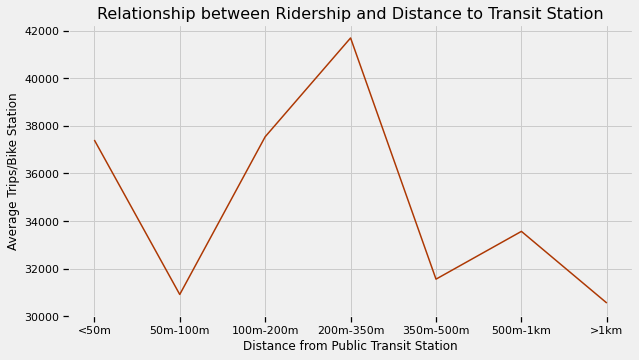

In [89]:
plt.figure(figsize = (9,5))
sns.set_palette("Oranges_r")
p7 = sns.lineplot(data = Average_Trips, x = 'Distance from Public Transit Station',
              y = 'Average Trips/Bike Station')

plt.title('Relationship between Ridership and Distance to Transit Station', fontsize=16)


plt.show()

### The result shows that bike stations located 200m-350m from the transit stations will have highest ridership. The bike stations less than 50 meters from the transit stations also have higher ridership. The previous hypothesis fails. The bike ridership does not have a linear relationship with the distance of that bike to transit stations. Toronto Bike Share could place more bikes beside transit stations or 200m-350m from the transit stations to increase ridership.


# 4.0 Relationship between Weather and Ridership
# 4.1 Weather Data Cleaning

Nan in the weather colomn represents clear weather, and the strings other than Nan mean bad weather conditions.

In [90]:
# Deal with the weather colomn-Replace nan with 0
data_merged['Weather'] = data_merged['Weather'].fillna(0)
# Replace others with 1
data_merged['Weather'] = data_merged['Weather'].where(data_merged['Weather'] == 0, 1)

weather_plot_data = data_merged.set_index('Start Time')
weather_plot_data

,Trip Id,Trip Duration,Start Station Id,Start Station Name,End Station Id,End Time,End Station Name,User Type,merge_time,Longitude (x),...,Month,Day,Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Precip. Amount (mm),Precip. Amount Flag
Start Time,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:03:00-05:00,712441,4.566667,7006,Bay St / College St (East Side),7021,2017-01-01 00:08:00-05:00,Bay St / Albert St,Member,2017-01-01 00:00:00-05:00,-79.4,...,1.0,1.0,1.5,69.0,39.0,16.1,99.81,0,NaN,NaN
2017-01-01 00:03:00-05:00,712442,8.966667,7046,Niagara St / Richmond St W,7147,2017-01-01 00:12:00-05:00,King St W / Fraser Ave,Member,2017-01-01 00:00:00-05:00,-79.4,...,1.0,1.0,1.5,69.0,39.0,16.1,99.81,0,NaN,NaN
2017-01-01 00:05:00-05:00,712443,16.533333,7048,Front St / Yonge St (Hockey Hall of Fame),7089,2017-01-01 00:22:00-05:00,Church St / Wood St,Member,2017-01-01 00:00:00-05:00,-79.4,...,1.0,1.0,1.5,69.0,39.0,16.1,99.81,0,NaN,NaN
2017-01-01 00:09:00-05:00,712444,16.750000,7177,East Liberty St / Pirandello St,7202,2017-01-01 00:26:00-05:00,Queen St W / York St (City Hall),Member,2017-01-01 00:00:00-05:00,-79.4,...,1.0,1.0,1.5,69.0,39.0,16.1,99.81,0,NaN,NaN
2017-01-01 00:14:00-05:00,712445,10.750000,7203,Bathurst St / Queens Quay W,7010,2017-01-01 00:25:00-05:00,King St W / Spadina Ave,Member,2017-01-01 00:00:00-05:00,-79.4,...,1.0,1.0,1.5,69.0,39.0,16.1,99.81,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30 23:59:00-05:00,13916477,9.216667,7274,Queen's Park Cres E / Grosvenor St - SMART,7382,2021-01-10 00:08:00-05:00,Simcoe St / Adelaide St W,Annual Member,2021-09-30 23:00:00-05:00,-79.4,...,9.0,30.0,12.9,71.0,5.0,16.1,101.56,0,NaN,NaN
2021-09-30 23:59:00-05:00,13916478,11.783333,7204,College St W / Crawford St,7020,2021-01-10 00:11:00-05:00,Phoebe St / Spadina Ave,Annual Member,2021-09-30 23:00:00-05:00,-79.4,...,9.0,30.0,12.9,71.0,5.0,16.1,101.56,0,NaN,NaN
2021-09-30 23:59:00-05:00,13916479,22.450000,7372,King St W / Portland St,7273,2021-01-10 00:22:00-05:00,Bay St / Charles St - SMART,Casual Member,2021-09-30 23:00:00-05:00,-79.4,...,9.0,30.0,12.9,71.0,5.0,16.1,101.56,0,NaN,NaN


In [91]:
#Only the related colomns are remained in the dataframe
weather_plot_data = weather_plot_data[['Start Station Id','Year','Month','Day',
                                      'Temp (°C)','Rel Hum (%)','Wind Spd (km/h)','Visibility (km)','Stn Press (kPa)','Weather']]
weather_plot_data

,Start Station Id,Year,Month,Day,Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Start Time,,,,,,,,,,
2017-01-01 00:03:00-05:00,7006,2017.0,1.0,1.0,1.5,69.0,39.0,16.1,99.81,0
2017-01-01 00:03:00-05:00,7046,2017.0,1.0,1.0,1.5,69.0,39.0,16.1,99.81,0
2017-01-01 00:05:00-05:00,7048,2017.0,1.0,1.0,1.5,69.0,39.0,16.1,99.81,0
2017-01-01 00:09:00-05:00,7177,2017.0,1.0,1.0,1.5,69.0,39.0,16.1,99.81,0
2017-01-01 00:14:00-05:00,7203,2017.0,1.0,1.0,1.5,69.0,39.0,16.1,99.81,0
...,...,...,...,...,...,...,...,...,...,...
2021-09-30 23:59:00-05:00,7274,2021.0,9.0,30.0,12.9,71.0,5.0,16.1,101.56,0
2021-09-30 23:59:00-05:00,7204,2021.0,9.0,30.0,12.9,71.0,5.0,16.1,101.56,0
2021-09-30 23:59:00-05:00,7372,2021.0,9.0,30.0,12.9,71.0,5.0,16.1,101.56,0


# 4.2 Weather Data Analysis

In [92]:
# Group the data by date
# Sum up the ridership, take average for other columns
weather_plot_data = weather_plot_data.groupby(['Year','Month','Day']).agg(dict({'Start Station Id':'count',
                                                    'Temp (°C)':'mean','Rel Hum (%)':'mean','Wind Spd (km/h)':'mean',
                                                    'Visibility (km)':'mean','Stn Press (kPa)':'mean','Weather':'mean'}))

In [93]:
# Weather_2 colomn remains the weather data in a 0-1 scale. The close the weather to 0, the clear the weather is.
weather_plot_data['Weather_2']=weather_plot_data['Weather']

In [94]:
# Calculate if the weather is good or bad in average.
weather_plot_data['Weather'][weather_plot_data['Weather']<0.5]=0
weather_plot_data['Weather'][weather_plot_data['Weather']>=0.5]=1
#Replace 0 with clear, replace 1 with bad weather
weather_plot_data['Weather'] = weather_plot_data['Weather'].replace(1,'bad weather').replace(0,'clear')
weather_plot_data

Start Station Id  Temp (°C)  Rel Hum (%)  Wind Spd (km/h)  \
Year   Month Day                                                               
2017.0 1.0   1.0                482   1.906432    62.941909        19.724066   
             2.0                826   3.708959    81.380145        23.176755   
             3.0                871   4.470264    96.805970        14.672790   
             4.0               1395  -2.142796    67.683871        45.756989   
             5.0               1210  -6.881157    65.740496        30.936364   
...                             ...        ...          ...              ...   
2021.0 12.0  7.0              12696  -2.730120    60.692974        22.872164   
             8.0              13957  -2.320148    78.391846        16.929211   
             9.0              12955  -1.369934    71.169510        19.749904   
             10.0             14340   4.239644    82.925174        17.495886   
             11.0             10049   8.162106    76.820977        36.994925   

                   Visibility (km)  Stn Press (kPa)      Weather  Weather_2  
Year   Month Day                                                             
2017.0 1.0   1.0         16.100000       101.229253        clear   0.000000  
             2.0         15.797821       101.453801        clear   0.024213  
             3.0         12.386567        99.586693  bad weather   0.676234  
             4.0         15.640072        99.229441  bad weather   0.567742  
             5.0         15.933388       100.229050        clear   0.147934  
...                            ...              ...          ...        ...  
2021.0 12.0  7.0         16.100000       101.209391        clear   0.169108  
             8.0         12.559862       100.597290        clear   0.381171  
             9.0         15.534296       101.068287        clear   0.053261  
             10.0        14.951883       100.575999        clear   0.000000  
             11.0        14.142492        98.423293        clear   0.207284  

[1611 rows x 8 columns]

In [95]:
# Rename the start station Id colomn to total daily trips
weather_plot_data.rename(columns = {'Start Station Id': 'Total Daily Trips'}, inplace=True)
weather_plot_data

Total Daily Trips  Temp (°C)  Rel Hum (%)  Wind Spd (km/h)  \
Year   Month Day                                                                
2017.0 1.0   1.0                 482   1.906432    62.941909        19.724066   
             2.0                 826   3.708959    81.380145        23.176755   
             3.0                 871   4.470264    96.805970        14.672790   
             4.0                1395  -2.142796    67.683871        45.756989   
             5.0                1210  -6.881157    65.740496        30.936364   
...                              ...        ...          ...              ...   
2021.0 12.0  7.0               12696  -2.730120    60.692974        22.872164   
             8.0               13957  -2.320148    78.391846        16.929211   
             9.0               12955  -1.369934    71.169510        19.749904   
             10.0              14340   4.239644    82.925174        17.495886   
             11.0              10049   8.162106    76.820977        36.994925   

                   Visibility (km)  Stn Press (kPa)      Weather  Weather_2  
Year   Month Day                                                             
2017.0 1.0   1.0         16.100000       101.229253        clear   0.000000  
             2.0         15.797821       101.453801        clear   0.024213  
             3.0         12.386567        99.586693  bad weather   0.676234  
             4.0         15.640072        99.229441  bad weather   0.567742  
             5.0         15.933388       100.229050        clear   0.147934  
...                            ...              ...          ...        ...  
2021.0 12.0  7.0         16.100000       101.209391        clear   0.169108  
             8.0         12.559862       100.597290        clear   0.381171  
             9.0         15.534296       101.068287        clear   0.053261  
             10.0        14.951883       100.575999        clear   0.000000  
             11.0        14.142492        98.423293        clear   0.207284  

[1611 rows x 8 columns]

# 4.3 Weather Condition vs. Ridership Plots
## 4.3.1 Relationship between General Weather Condition and Ridership

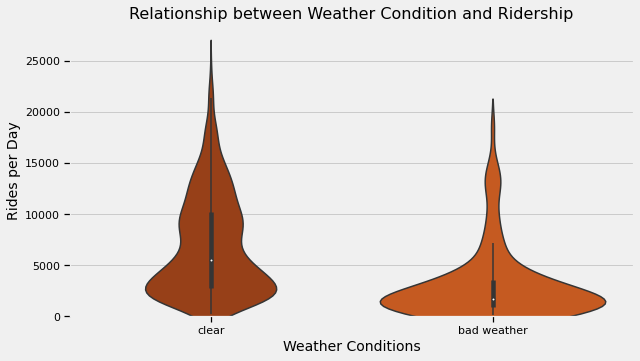

In [96]:
plt.figure(figsize = (9,5))
sns.color_palette()
sns.violinplot(x=weather_plot_data['Weather'],y=weather_plot_data['Total Daily Trips'])

plt.xlabel('Weather Conditions',fontsize=14)
plt.ylabel('Rides per Day',fontsize=14)
plt.title('Relationship between Weather Condition and Ridership',fontsize=16)
plt.ylim(0,)
plt.show()

<Figure size 648x360 with 0 Axes>

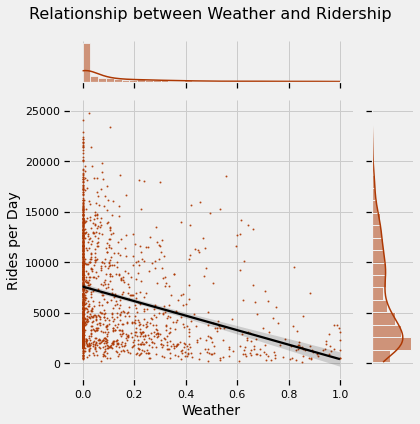

In [97]:

plt.figure(figsize = (9,5))
sns.set_palette("Oranges_r")
p6 = sns.jointplot(data = weather_plot_data, x = 'Weather_2', 
              y = 'Total Daily Trips', kind="reg", joint_kws={'line_kws':{'color':"k"}}, scatter_kws={"s":1})

plt.suptitle('Relationship between Weather and Ridership', fontsize=16)

p6.set_axis_labels('Weather', 'Rides per Day', fontsize=14)

plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()

## 4.3.2 Relationship between Temperature and Ridership

<Figure size 648x360 with 0 Axes>

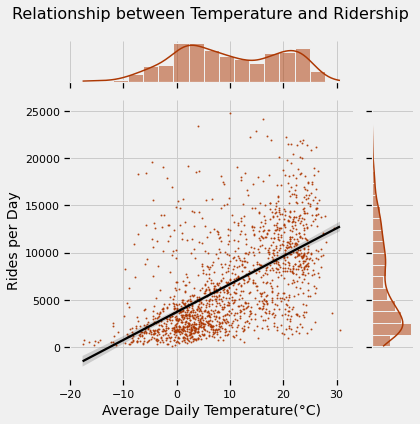

In [98]:
plt.figure(figsize = (9,5))
sns.set_palette("Oranges_r")
p1 = sns.jointplot(data = weather_plot_data, x = 'Temp (°C)', 
              y = 'Total Daily Trips', kind="reg", joint_kws={'line_kws':{'color':"k"}}, scatter_kws={"s":1})

plt.suptitle('Relationship between Temperature and Ridership', fontsize=16)

p1.set_axis_labels('Average Daily Temperature(°C)', 'Rides per Day', fontsize=14)

plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()

## 4.3.3 Relationship between Humidity and Ridership

<Figure size 648x360 with 0 Axes>

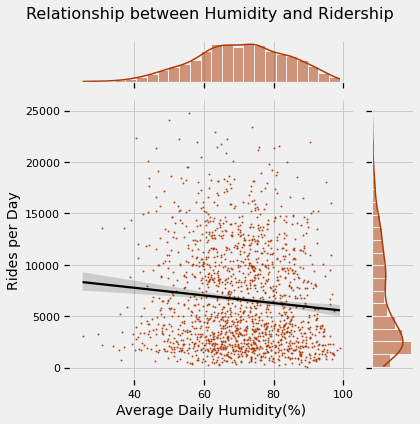

In [99]:
plt.figure(figsize = (9,5))
sns.set_palette("Oranges_r")
p2 = sns.jointplot(data = weather_plot_data, x = 'Rel Hum (%)', 
              y = 'Total Daily Trips', kind="reg", joint_kws={'line_kws':{'color':"k"}}, scatter_kws={"s":1})

plt.suptitle('Relationship between Humidity and Ridership', fontsize=16)

p2.set_axis_labels('Average Daily Humidity(%)', 'Rides per Day', fontsize=14)

plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()

## 4.3.4 Relationship between Windspeed and Ridership

<Figure size 648x360 with 0 Axes>

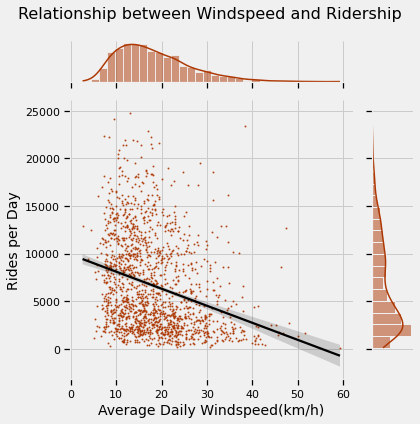

In [100]:
plt.figure(figsize = (9,5))
sns.set_palette("Oranges_r")
p3 = sns.jointplot(data = weather_plot_data, x = 'Wind Spd (km/h)', 
              y = 'Total Daily Trips', kind="reg", joint_kws={'line_kws':{'color':"k"}}, scatter_kws={"s":1})

plt.suptitle('Relationship between Windspeed and Ridership', fontsize=16)

p3.set_axis_labels('Average Daily Windspeed(km/h)', 'Rides per Day', fontsize=14)

plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()

## 4.3.2 Relationship between Visibility and Ridership

<Figure size 648x360 with 0 Axes>

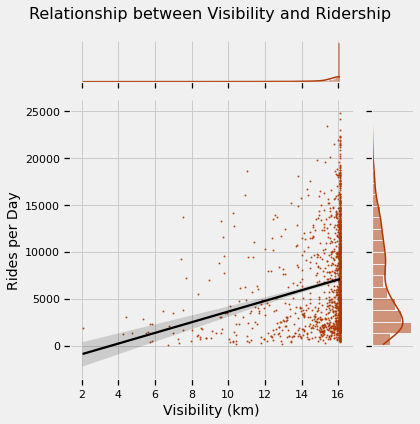

In [101]:
plt.figure(figsize = (9,5))
sns.set_palette("Oranges_r")
p4 = sns.jointplot(data = weather_plot_data, x = 'Visibility (km)', 
              y = 'Total Daily Trips', kind="reg", joint_kws={'line_kws':{'color':"k"}}, scatter_kws={"s":1})

plt.suptitle('Relationship between Visibility and Ridership', fontsize=16)
p4.set_axis_labels('Visibility (km)', 'Rides per Day', fontsize=14)

plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()

## 4.3.2 Relationship between Air Pressure and Ridership

<Figure size 648x360 with 0 Axes>

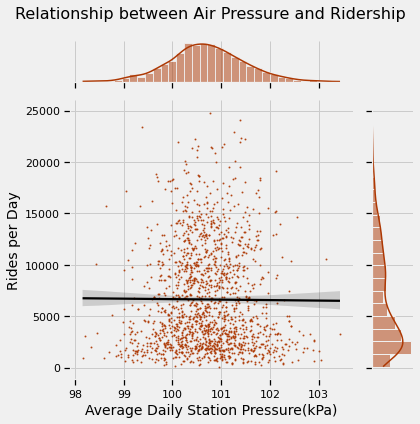

In [102]:
plt.figure(figsize = (9,5))
sns.set_palette("Oranges_r")
p5 = sns.jointplot(data = weather_plot_data, x = 'Stn Press (kPa)', 
              y = 'Total Daily Trips', kind="reg", joint_kws={'line_kws':{'color':"k"}}, scatter_kws={"s":1})

plt.suptitle('Relationship between Air Pressure and Ridership', fontsize=16)
p5.set_axis_labels('Average Daily Station Pressure(kPa)', 'Rides per Day', fontsize=14)

plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()

### Results:
1. Both joint plot and violin plot show that clear weather day will have more ridership than bad weather day.
2. Higher temperature will have higher ridership. 
3. Higher humidity will have lower ridership, but the correlation is very weak.
4. Higher wind speed will have lower ridership.
5. Higher visibility will have higher ridership.
6. No obvious correlation between air pressure and ridership.


# 5.0 Strategy Assessment: Membership System

In [177]:
#get a copy of the cleaned dataset
sample = data_merged.copy()

#rewrite year, month, day column (merge fail in 2021)
sample['Year'] = sample['Start Time'].apply(lambda row: row.year)

sample['Month'] = sample['Start Time'].apply(lambda row: row.month)
sample['Day'] = sample['Start Time'].apply(lambda row: row.day)

#check
sample[sample['Start Time'].apply(lambda row: row.year==2021)]

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,User Type,merge_time,...,Month,Day,Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Precip. Amount (mm),Precip. Amount Flag
8344951,10644218,21.916667,7021.0,2021-01-01 00:04:00-05:00,Bay St / Albert St,7164.0,2021-01-01 00:26:00-05:00,Gould St / Yonge St (Ryerson University),Annual Member,2021-01-01 00:00:00-05:00,...,1,1,-1.3,78.0,4.0,16.1,102.17,NaN,NaN,NaN
8344952,10644220,6.600000,7534.0,2021-01-01 00:07:00-05:00,Walnut Ave / Queen St W,7524.0,2021-01-01 00:13:00-05:00,Lisgar Park,Casual Member,2021-01-01 00:00:00-05:00,...,1,1,-1.3,78.0,4.0,16.1,102.17,NaN,NaN,NaN
8344953,10644221,1.433333,7162.0,2021-01-01 00:10:00-05:00,Hayter St / Laplante Ave,7006.0,2021-01-01 00:11:00-05:00,Bay St / College St (East Side),Annual Member,2021-01-01 00:00:00-05:00,...,1,1,-1.3,78.0,4.0,16.1,102.17,NaN,NaN,NaN
8344954,10644222,12.350000,7003.0,2021-01-01 00:10:00-05:00,Madison Ave / Bloor St W,7272.0,2021-01-01 00:22:00-05:00,Yonge St / Dundonald St - SMART,Casual Member,2021-01-01 00:00:00-05:00,...,1,1,-1.3,78.0,4.0,16.1,102.17,NaN,NaN,NaN
8344955,10644223,34.550000,7562.0,2021-01-01 00:11:00-05:00,Priscilla Ave / Dundas St W - SMART,7562.0,2021-01-01 00:45:00-05:00,Priscilla Ave / Dundas St W - SMART,Casual Member,2021-01-01 00:00:00-05:00,...,1,1,-1.3,78.0,4.0,16.1,102.17,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11628615,13916477,9.216667,7274.0,2021-09-30 23:59:00-05:00,Queen's Park Cres E / Grosvenor St - SMART,7382.0,2021-01-10 00:08:00-05:00,Simcoe St / Adelaide St W,Annual Member,2021-09-30 23:00:00-05:00,...,9,30,12.9,71.0,5.0,16.1,101.56,NaN,NaN,NaN
11628616,13916478,11.783333,7204.0,2021-09-30 23:59:00-05:00,College St / Crawford St,7020.0,2021-01-10 00:11:00-05:00,Phoebe St / Spadina Ave,Annual Member,2021-09-30 23:00:00-05:00,...,9,30,12.9,71.0,5.0,16.1,101.56,NaN,NaN,NaN
11628617,13916479,22.450000,7372.0,2021-09-30 23:59:00-05:00,King St W / Portland St,7273.0,2021-01-10 00:22:00-05:00,Bay St / Charles St - SMART,Casual Member,2021-09-30 23:00:00-05:00,...,9,30,12.9,71.0,5.0,16.1,101.56,NaN,NaN,NaN
11628618,13916480,14.983333,7002.0,2021-09-30 23:59:00-05:00,St. George St / Bloor St W,7463.0,2021-01-10 00:14:00-05:00,Adelaide St W / Brant St,Annual Member,2021-09-30 23:00:00-05:00,...,9,30,12.9,71.0,5.0,16.1,101.56,NaN,NaN,NaN


In [178]:
sample['User Type'].value_counts() #different name for member and casaul

annual_user = sample.groupby(['Year','User Type']).count()['Trip Id']
annual_user

Year  User Type    
2016  Casual                 1
      Member                57
2017  Casual            250910
      Member           1143169
2018  Annual Member    1557304
      Casual Member     285672
2019  Annual Member    1836080
      Casual Member     506643
2020  Annual Member    1849313
      Casual Member     915802
2021  Annual Member    2009004
      Casual Member    1274665
Name: Trip Id, dtype: int64

In [180]:
#drop 2016 (error)
sample = sample.drop(sample[sample.Year == 2016].index)
#drop 2021, december (error)
sample = sample.drop(sample[(sample['Month']==12)&(sample['Year']==2021)].index)

#check
annual_user = sample.groupby(['Year','User Type']).count()['Trip Id']
annual_user

Year  User Type    
2017  Casual            250910
      Member           1143169
2018  Annual Member    1557304
      Casual Member     285672
2019  Annual Member    1836080
      Casual Member     506643
2020  Annual Member    1849313
      Casual Member     915802
2021  Annual Member    1941620
      Casual Member    1231587
Name: Trip Id, dtype: int64

In [181]:
#unify the user type column
sample.loc[sample["User Type"] == 'Casual','User Type'] = 'Casual Member'
sample.loc[sample["User Type"] == 'Member','User Type'] = 'Annual Member'

## 5.1 Annual Pattern

In [182]:
annual_user = sample.groupby(['Year','User Type']).count()['Trip Id']
annual_user

Year  User Type    
2017  Annual Member    1143169
      Casual Member     250910
2018  Annual Member    1557304
      Casual Member     285672
2019  Annual Member    1836080
      Casual Member     506643
2020  Annual Member    1849313
      Casual Member     915802
2021  Annual Member    1941620
      Casual Member    1231587
Name: Trip Id, dtype: int64

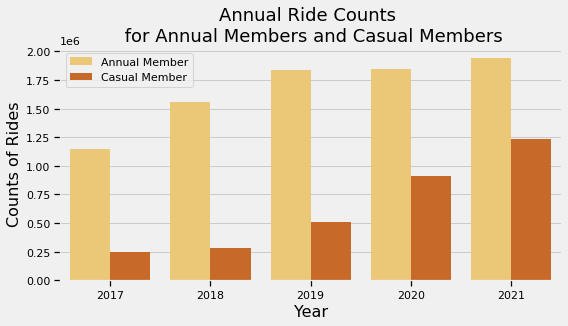

In [183]:
#Annual Plot 1
plt.figure(figsize=(8, 4))
plt.title('Annual Ride Counts \n for Annual Members and Casual Members', fontsize=18)

sns.barplot(x="Year", y="Trip Id", hue="User Type", data=annual_user.reset_index(),ci = None,palette = "YlOrBr")

plt.xlabel('Year', fontsize = 16)
plt.ylabel('Counts of Rides', fontsize = 16)
plt.legend()
plt.show()


Interpretation: we see the trends in the number of annual rides in annual & casual are both increasing.
We can roughly see the number of percentage increase for casual member from 2019-2020 is large (vs annual member)
But how about the percentage of increasing exactly? are they the same?

In [184]:
annual_user_reindex = annual_user.reset_index()
#add a new column
annual_user_reindex['PercentChange']=np.nan

In [185]:
#calculate growth rate
for i in range(2,10):
    change = (annual_user_reindex.iloc[i]['Trip Id']-annual_user_reindex.iloc[i-2]['Trip Id'])/annual_user_reindex.iloc[i]['Trip Id']
    annual_user_reindex['PercentChange'].iloc[i] = np.round(change*100,2)

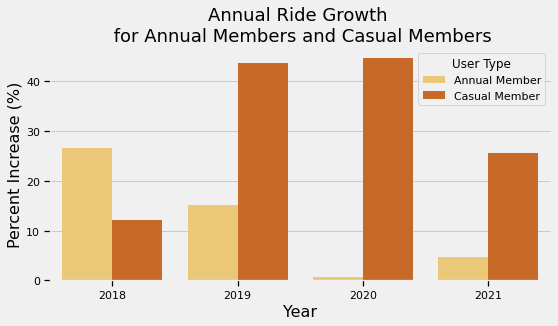

In [186]:
#Annual Plot 2
plt.figure(figsize=(8, 4))
plt.title('Annual Ride Growth \n for Annual Members and Casual Members', fontsize=18)

sns.barplot(x="Year", y="PercentChange", hue="User Type", data=annual_user_reindex.iloc[2:10],ci = None,palette = "YlOrBr")

plt.xlabel('Year', fontsize = 16)
plt.ylabel('Percent Increase (%)', fontsize = 16)
plt.show()

#We can see very interesting different increase trends in annual vs casual. 
#Annual: increase trend decrease 2018-2019 (0.72% increase in 2020)
#Casual: increasing increase trend 2018-2019(keep round 40% incrase in 2019 and 2020)
#Possible reason: covid-regular bike commuter-decrease, but regular bus or rail users-switch
#Note: 2021 no december data

## 5.2 Monthly Pattern

In [187]:
monthly_user = sample.groupby(['Month','User Type']).count()['Trip Id']

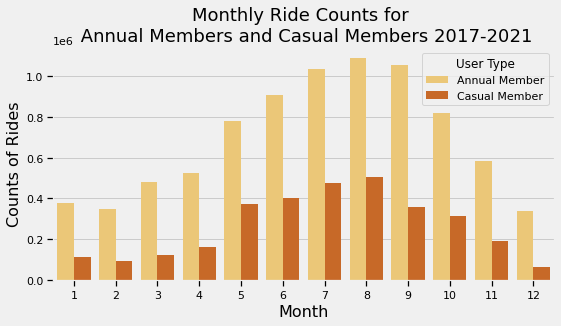

In [188]:
#Monthly Plot 1
plt.figure(figsize=(8, 4))
plt.title('Monthly Ride Counts for \n Annual Members and Casual Members 2017-2021', fontsize=18)

sns.barplot(x="Month", y="Trip Id", hue="User Type", data=monthly_user.reset_index(),ci = None,palette = "YlOrBr")

plt.xlabel('Month', fontsize = 16)
plt.ylabel('Counts of Rides', fontsize = 16)
plt.show()

In [189]:
monthly_user_year = sample.groupby(['Year','Month','User Type']).count()['Trip Id']
monthly_user_year_reindex = monthly_user_year.reset_index()
#create a new column YearMonth
monthly_user_year_reindex['YearM']=monthly_user_year_reindex["Month"].astype(str) + '\n' + monthly_user_year_reindex["Year"].astype(str).apply(lambda x: x[-2:])  

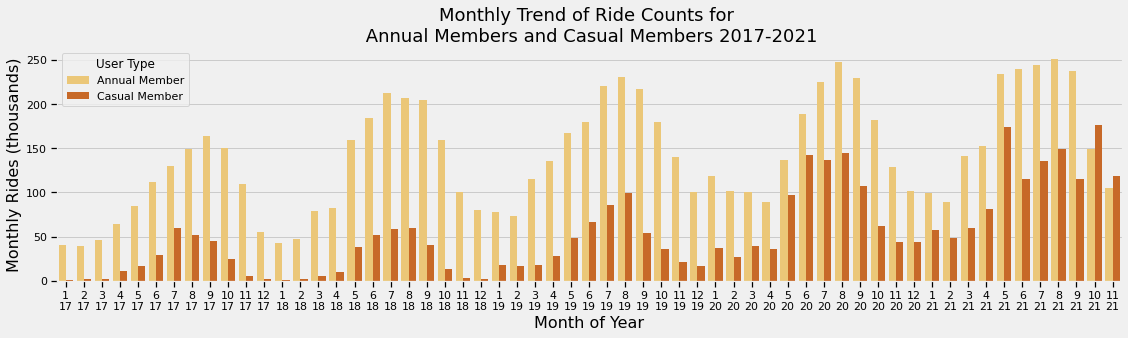

In [190]:
#Monthly 2
plt.figure(figsize=(17, 4))
plt.title('Monthly Trend of Ride Counts for \n Annual Members and Casual Members 2017-2021', fontsize=18)

ax = sns.barplot(x=monthly_user_year_reindex['YearM'], y=monthly_user_year_reindex['Trip Id']/1000, data=monthly_user_year_reindex,hue = 'User Type',ci = None,palette = "YlOrBr")
plt.xlabel('Month of Year', fontsize = 16)
plt.ylabel('Monthly Rides (thousands)', fontsize = 16)

#plt.xticks(rotation=45)
plt.show()

## 5.3 Daily Pattern

In [191]:
#Create a function to return whether a date is workday
def is_business_day(date):
    return bool(len(pd.bdate_range(date, date)))

#Get the number of counts in each user type
df_user = sample.groupby([sample["Start Time"].dt.date,"User Type"]).count()["Trip Id"].unstack()

#Get the number of counts in total
rides = sample.groupby([sample["Start Time"].dt.date]).count()['Trip Id']

#Combine them into a dataframe
data_days = pd.DataFrame({'rides':rides, 'annual_members': df_user['Annual Member'], 'casual_members':df_user['Casual Member']})

#Input the workday info
data_days['workday'] = data_days.index
data_days['workday'] = data_days['workday'].apply(is_business_day)

# View DataFrame
data_days.head()

,rides,annual_members,casual_members,workday
Start Time,,,,
2017-01-01,482,412.0,70.0,False
2017-01-02,826,756.0,70.0,True
2017-01-03,871,853.0,18.0,True
2017-01-04,1395,1361.0,34.0,True
2017-01-05,1210,1191.0,19.0,True


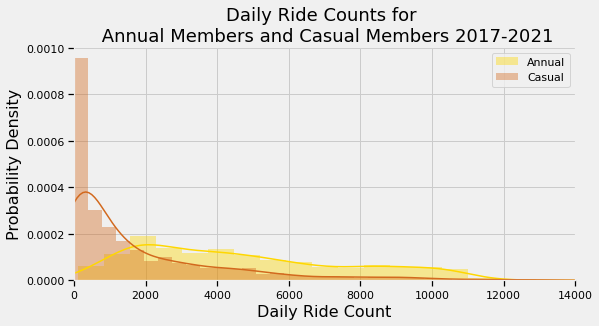

In [192]:
# Daily 1
plt.figure(figsize=(8, 4))
ax = sns.distplot(data_days['annual_members'], label='Annual',color = 'gold')
ax = sns.distplot(data_days['casual_members'], label='Casual', color = 'chocolate')

ax.set_title('Daily Ride Counts for \n Annual Members and Casual Members 2017-2021',fontsize=18)
plt.xlim([0, 14000])
plt.xlabel('Daily Ride Count',fontsize = 16)
plt.ylabel('Probability Density',fontsize = 16)
plt.legend()

## 5.4 Duration Distribution

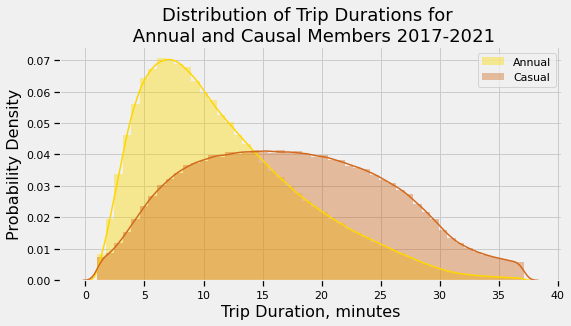

In [194]:
#duration dist. for different members
plt.figure(figsize=(8, 4))
plt.title('Distribution of Trip Durations for \n Annual and Causal Members 2017-2021', fontsize=18)

ax = sns.distplot(sample[sample['User Type']=='Annual Member']['Trip Duration'], label='Annual', color='gold')
ax = sns.distplot(sample[sample['User Type']=='Casual Member']['Trip Duration'], label='Casual',color='chocolate')

plt.xlabel('Trip Duration, minutes', fontsize = 16)
plt.ylabel('Probability Density', fontsize = 16)

ax.legend()
plt.show()

## 5.5 Day of Week Pattern

In [195]:
#Time of the day difference for annual vs casual members
# # Write your code here.
data_hours = sample.groupby('merge_time').agg(
    rides = pd.NamedAgg(column='merge_time', aggfunc=lambda x: x.count()),
    annual_members = pd.NamedAgg(column='User Type', aggfunc=lambda x: x[x=='Annual Member'].count()),
    casual_members = pd.NamedAgg(column='User Type', aggfunc=lambda x: x[x=='Casual Member'].count()),
)
data_hours["Start Time"] = data_hours.index.hour
data_hours = data_hours.groupby("Start Time").mean()

# # View DataFrame
data_hours.head()

,rides,annual_members,casual_members
Start Time,,,
0,76.186974,48.281303,27.905671
1,47.536818,29.311411,18.225408
2,32.540387,19.687144,12.853242
3,17.445539,10.525492,6.920046
4,13.036543,8.978538,4.058005


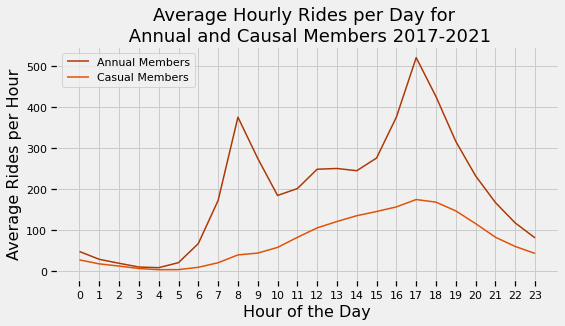

In [196]:
# Write your code here.
plt.figure(figsize=(8, 4))
plt.title('Average Hourly Rides per Day for \n Annual and Causal Members 2017-2021', fontsize=18)

sns.lineplot(data=data_hours, x=data_hours.index, y='annual_members', label='Annual Members')
sns.lineplot(data=data_hours, x=data_hours.index, y='casual_members', label='Casual Members')
plt.xticks(range(24))
plt.xlabel('Hour of the Day', fontsize=16)
plt.ylabel('Average Rides per Hour', fontsize=16)
plt.show()


#Peaks of the annual member are concentarted in the morning rush hour and afternoon peak hours. 
#The peak of the casutal members are not obverse and concentrated in the afternoon especially during the afternoon rush hours. 
#The annual members are using the bike for commute every day while the casual member may not have a high demand for the bikes for commute purposes.

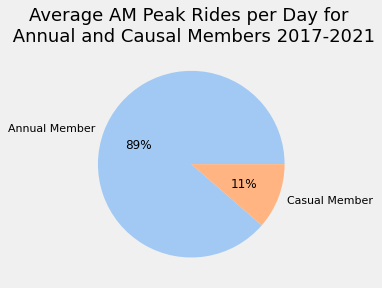

In [197]:
#pm peak hr pie chart
data_hours_ampeak = data_hours[(data_hours.index>=7)&(data_hours.index<=9)]
data_am = [data_hours_ampeak['annual_members'].sum(),data_hours_ampeak['casual_members'].sum()]
labels = ['Annual Member','Casual Member']

plt.figure(figsize=(8, 4))
plt.title('Average AM Peak Rides per Day for \n Annual and Causal Members 2017-2021', fontsize=18)

plt.pie(data_am, labels = labels, autopct='%.0f%%',colors = sns.color_palette('pastel')[0:2])

plt.show()

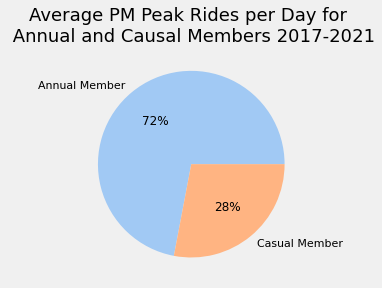

In [198]:
#pm peak hr pie chart
data_hours_pmpeak = data_hours[(data_hours.index>=17)&(data_hours.index<=19)]
data_pm = [data_hours_pmpeak['annual_members'].sum(),data_hours_pmpeak['casual_members'].sum()]
labels = ['Annual Member','Casual Member']

plt.figure(figsize=(8, 4))
plt.title('Average PM Peak Rides per Day for \n Annual and Causal Members 2017-2021', fontsize=18)

plt.pie(data_pm, labels = labels, autopct='%.0f%%',colors = sns.color_palette('pastel')[0:2])

plt.show()

# 6.0 Strategy Assessment: Free Ride Wednesday

In [199]:
#insert new row weekday
sample['Weekday'] = sample['Start Time'].apply(lambda row: row.isoweekday())
#get all free wed. months data
user_wed = sample[((sample['Month']==7)&(sample['Year']==2021))|((sample['Month']==9)&(sample['Year']==2020))|
                 ((sample['Month']==8)&(sample['Year']==2019))|((sample['Month']==6)&(sample['Year']==2018))|
                 ((sample['Month']==7)&(sample['Year']==2017))]
user_wed = user_wed.groupby(['Weekday']).count()

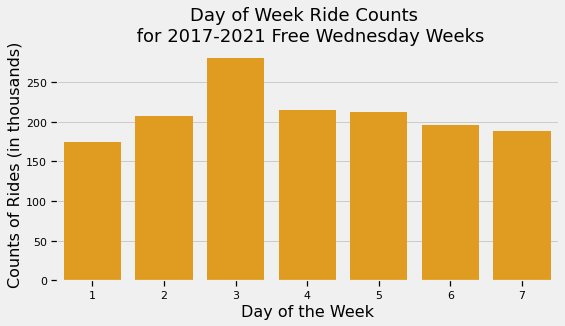

In [200]:
#Wednesday Plot 1
plt.figure(figsize=(8, 4))
plt.title('Day of Week Ride Counts \n for 2017-2021 Free Wednesday Weeks', fontsize=18)

sns.barplot(x="Weekday", y=user_wed.reset_index()["Trip Id"]/1000, data=user_wed.reset_index(),ci = None,color= "orange")

plt.xlabel('Day of the Week', fontsize = 16)
plt.ylabel('Counts of Rides (in thousands)', fontsize = 16)
plt.show()

In [201]:
#get all non-free wed. months data
user_nonwed = sample[~(((sample['Month']==7)&(sample['Year']==2021))|((sample['Month']==9)&(sample['Year']==2020))|
                 ((sample['Month']==8)&(sample['Year']==2019))|((sample['Month']==6)&(sample['Year']==2018))|
                 ((sample['Month']==7)&(sample['Year']==2017)))]
user_nonwed = user_nonwed.groupby(['Weekday']).count()

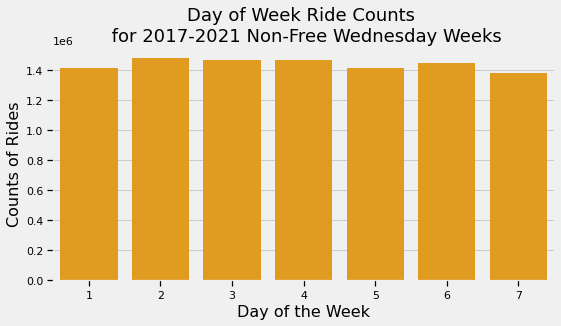

In [202]:
#Non-Wednesday Weekly Plot 1
plt.figure(figsize=(8, 4))
plt.title('Day of Week Ride Counts \n for 2017-2021 Non-Free Wednesday Weeks', fontsize=18)

sns.barplot(x="Weekday", y=user_nonwed.reset_index()["Trip Id"], data=user_nonwed.reset_index(),ci = None,color= "orange")

plt.xlabel('Day of the Week', fontsize = 16)
plt.ylabel('Counts of Rides', fontsize = 16)
plt.show()

In [203]:
#for different members
user_nonwed_user = sample[~(((sample['Month']==7)&(sample['Year']==2021))|((sample['Month']==9)&(sample['Year']==2020))|
                 ((sample['Month']==8)&(sample['Year']==2019))|((sample['Month']==6)&(sample['Year']==2018))|
                 ((sample['Month']==7)&(sample['Year']==2017)))]

user_nonwed_user = user_nonwed_user.groupby(['Weekday','User Type']).count()

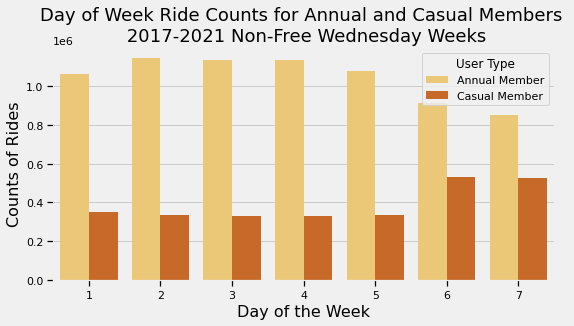

In [204]:
#Wednesday Plot 2
plt.figure(figsize=(8, 4))
plt.title('Day of Week Ride Counts for Annual and Casual Members \n 2017-2021 Non-Free Wednesday Weeks', fontsize=18)

sns.barplot(x="Weekday", y=user_nonwed_user.reset_index()["Trip Id"], data=user_nonwed_user.reset_index(),hue='User Type', ci = None,palette = "YlOrBr")

plt.xlabel('Day of the Week', fontsize = 16)
plt.ylabel('Counts of Rides', fontsize = 16)
plt.show()

In [205]:
user_wed = sample[((sample['Month']==7)&(sample['Year']==2021))|((sample['Month']==9)&(sample['Year']==2020))|
                 ((sample['Month']==8)&(sample['Year']==2019))|((sample['Month']==6)&(sample['Year']==2018))|
                 ((sample['Month']==7)&(sample['Year']==2017))]
user_wed = user_wed.groupby(["Year",'Weekday']).count()

In [207]:
user_wed_reindex = user_wed.reset_index()
#add new column: Year-day of Week
user_wed_reindex['YearW']=user_wed_reindex["Year"].astype(str).apply(lambda x: x[-2:]) + '- ' + user_wed_reindex["Weekday"].astype(str)

In [209]:
#create x ticks for better visualization
wklist = [str(x) for x in range(2,8)]
year_wk = np.concatenate((['1 \n\n2017'], wklist,['1 \n\n2018'], wklist,['1 \n\n2019'], wklist,
               ['1 \n\n2020'], wklist,['1 \n\n2021'], wklist), axis=None)

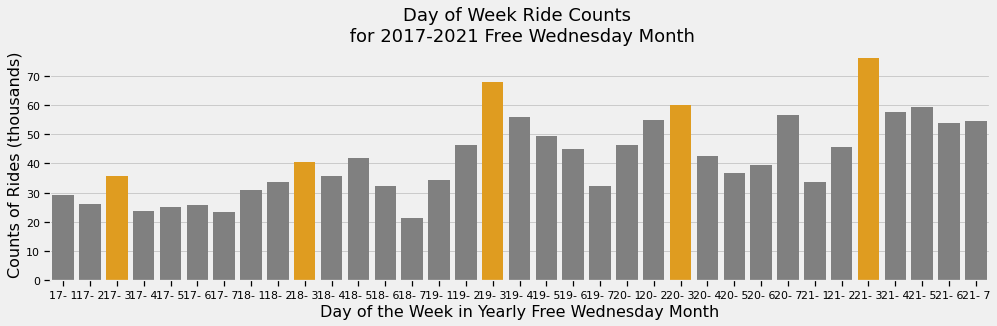

In [211]:
#Wednesday Plot 3
plt.figure(figsize=(15, 4))
plt.title('Day of Week Ride Counts \n for 2017-2021 Free Wednesday Month', fontsize=18)
clrs = ["orange" if (x.endswith('3')) else 'grey' for x in user_wed_reindex['YearW'] ]
ax = sns.barplot(x=user_wed_reindex['YearW'], y=user_wed_reindex["Trip Id"]/1000, data=user_wed_reindex,ci = None,palette=clrs)

plt.xlabel('Day of the Week in Yearly Free Wednesday Month', fontsize = 16)
plt.ylabel('Counts of Rides (thousands)', fontsize = 16)
#ax.set_xticklabels(year_wk)
#plt.xticks(rotation=45)
plt.show()

In [212]:
#Member Difference in Free Wed
user_wed_member = sample[((sample['Month']==7)&(sample['Year']==2021))|((sample['Month']==9)&(sample['Year']==2020))|

                 ((sample['Month']==8)&(sample['Year']==2019))|((sample['Month']==6)&(sample['Year']==2018))|

                 ((sample['Month']==7)&(sample['Year']==2017))].groupby(['Year','Weekday','User Type']).count()

user_wed_member_reindex = user_wed_member.reset_index()

In [215]:
user_wed_member_reindex['YearW']=user_wed_member_reindex["Weekday"].astype(str) + '\n' + user_wed_member_reindex["Year"].astype(str).apply(lambda x: x[-2:])
user_wed_member_reindex

,Year,Weekday,User Type,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,...,Day,Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Precip. Amount (mm),Precip. Amount Flag,YearW
0,2017,1,Annual Member,22159,22159,0,22159,22159,0,22159,...,22159,22159,22159,22159,22159,22159,421,0,0,1\n17
1,2017,1,Casual Member,7164,7164,0,7164,7164,0,7164,...,7164,7164,7164,7164,7164,7164,248,0,0,1\n17
2,2017,2,Annual Member,21107,21107,0,21107,21107,0,21107,...,21107,21107,21107,21107,21107,21107,1919,0,0,2\n17
3,2017,2,Casual Member,4892,4892,0,4892,4892,0,4892,...,4892,4892,4892,4892,4892,4892,266,0,0,2\n17
4,2017,3,Annual Member,20446,20446,0,20446,20446,0,20446,...,20446,20446,20446,20446,20446,20446,2405,0,0,3\n17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2021,5,Casual Member,17395,17395,17395,17395,17393,17395,17395,...,17395,17395,14976,17395,17395,17395,653,0,0,5\n21
66,2021,6,Annual Member,30792,30792,30792,30792,30792,30792,30792,...,30792,30792,30519,30451,30792,30792,4071,0,0,6\n21
67,2021,6,Casual Member,22981,22981,22981,22981,22981,22981,22981,...,22981,22981,22915,22830,22981,22981,2285,0,0,6\n21
68,2021,7,Annual Member,30253,30253,30253,30253,30229,30253,30253,...,30253,30253,30253,30253,30253,30253,3770,0,0,7\n21


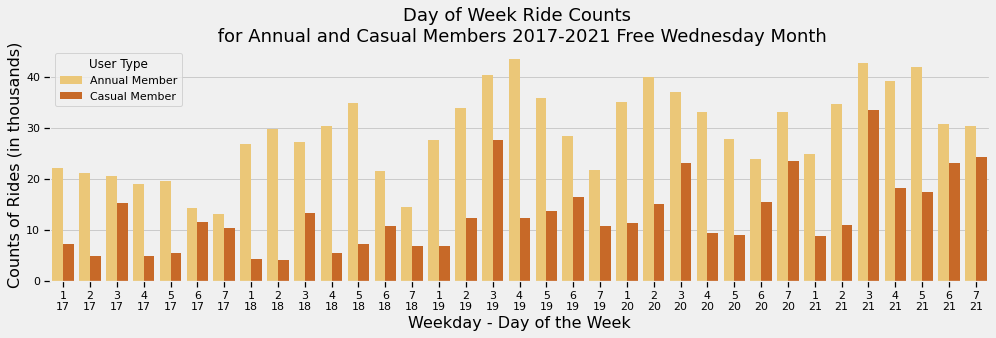

In [216]:
#Wednesday Plot 4
#different influnece for casual member and annual member

plt.figure(figsize=(15, 4))
plt.title('Day of Week Ride Counts \n for Annual and Casual Members 2017-2021 Free Wednesday Month', fontsize=18)

sns.barplot(x=user_wed_member_reindex['YearW'], y=user_wed_member_reindex["Trip Id"]/1000, data=user_wed_member_reindex,hue = 'User Type',ci = None,palette = "YlOrBr")

plt.xlabel('Weekday - Day of the Week', fontsize = 16)
plt.ylabel('Counts of Rides (in thousands)', fontsize = 16)
#plt.xticks(rotation=45)
plt.show()